## A) Import libs

In [4]:
#import libs
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
# import math
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# import ipywidgets as widgets
# from ipywidgets import interact
from torch.optim.lr_scheduler import ReduceLROnPlateau
import random
import matplotlib.lines as mlines

# import files 
from DataSet import DataSet
from DataGen import DataGen 
from FixedGP import FixedGP 
from DataGen import DataGen
from DataAugmentation import augment_with_horizontal_flip, augment_with_vertical_flip, augment_with_opposit_map_values
from utilities import standardize_vector, map_plot, labeled_inputs_plot, compare_output_label, plot_combinations
#from MapUpdateNetwork import MapUpdateNetwork

## B) Load data from pth file

In [5]:
def concatenate_dataset(input_files):
    """
    Concatène les données de plusieurs fichiers.

    Args:
        input_files (list of str): Liste des chemins des fichiers à charger.
    """
    # Initialisation des listes pour stocker les données concaténées
    all_train_input = []
    all_train_label = []
    all_descriptions = []

    # Charger et concaténer les données
    for file in input_files:
        loaded_data = torch.load(file, weights_only=True)
        all_train_input.append(loaded_data["train_input"])
        all_train_label.append(loaded_data["train_label"])
        all_descriptions.append(loaded_data["description"])

    # Concaténer les tenseurs et les listes
    concatenated_train_input = torch.cat(all_train_input, dim=0)
    concatenated_train_label = torch.cat(all_train_label, dim=0)
    concatenated_description = "; ".join(all_descriptions)

    # Sauvegarder les données concaténées
    output_data = {
        "train_input": concatenated_train_input,
        "train_label": concatenated_train_label,
        "description": concatenated_description,
    }
    return(output_data)

In [6]:
nb_queries = 5
nb_k_comb = 10
LETTER = 'C'

In [7]:
input_files = [f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat1_emgALL.pth',
               f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat2_emgALL.pth',
               f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat3_emgALL.pth',
               f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat4_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_1 = concatenate_dataset(input_files)
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
train_input = loaded_data_1["train_input"]  # The input data for training
train_label = loaded_data_1["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_1["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat1_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat1_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT unique

In [8]:
input_files = [f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat5_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_2 = concatenate_dataset(input_files)
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
test_input = loaded_data_2["train_input"]  # The input data for training
test_label = loaded_data_2["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_2["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat5_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat5_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT unique

In [9]:
input_files = [f'dataset/emgALL/og_{LETTER}_{nb_queries}que_{nb_k_comb}kcomb_rat6_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_3 = concatenate_dataset(input_files) 
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
validation_input = loaded_data_3["train_input"]  # The input data for training
validation_label = loaded_data_3["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_3["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat6_emg1
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 5que_10kcomb_rat6_emg2
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT unique

### Visualize the labeled data 

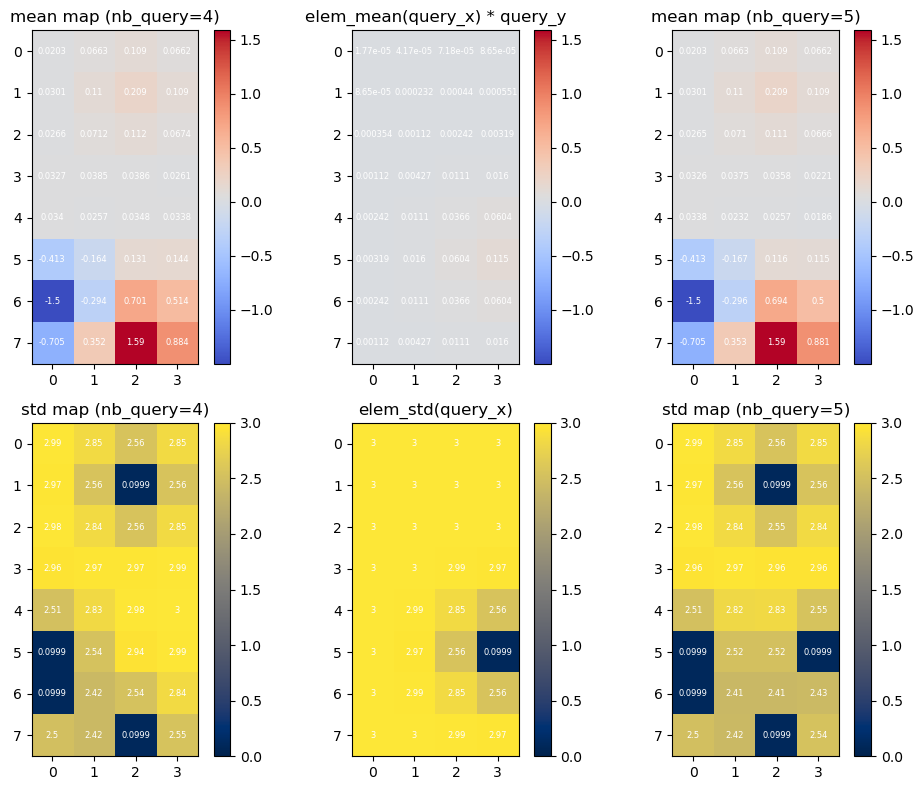

In [10]:
labeled_inputs_plot(train_input=train_input, train_label=train_label, comb_idx=0, values=True)

## C) Build NN model

In [11]:
class MapUpdateNetwork_1(nn.Module):
    """
    A convolutional neural network designed for processing and updating map-like structures.
    The network takes four input images as input, encodes their features, and decodes them 
    to generate an output map of the same spatial dimensions as the inputs.

    Attributes:
        encoder (nn.Sequential): Encoder that reduces spatial dimensions and extracts high-level features.
        decoder (nn.Sequential): Decoder that reconstructs the spatial dimensions from encoded features.

    Methods:
        __init__(in_channels, out_channels, out_channels_first_conv):
            Initializes the network with configurable input/output channels and feature depth.
        forward(img1, img2, img3, img4):
            Performs the forward pass by concatenating the input images, encoding their features, 
            and decoding them to produce the final map.
    """

    def __init__(self, in_channels=4, out_channels=2, out_channels_first_conv=16):
        """
        Initializes the MapUpdateNetwork.

        Args:
            in_channels (int): Number of input channels. Defaults to 4 (for concatenated input images).
            out_channels (int): Number of output channels. Defaults to 2.
            out_channels_first_conv (int): Number of channels in the first convolutional layer. Defaults to 16.
        """
        super(MapUpdateNetwork_1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4*out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 64 x 4x2 => 32 x 4x2
            nn.ReLU(),
            nn.ConvTranspose2d(2*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1), # 32 x 4x2 => 16 x 8x4
            nn.ReLU()
        )
        self.final_layer1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.final_layer2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Combines four input images, processes them through
        an encoder-decoder architecture, and outputs an updated map.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, C, H, W).
            img2 (torch.Tensor): Second input image tensor of shape (B, C, H, W).
            img3 (torch.Tensor): Third input image tensor of shape (B, C, H, W).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, C, H, W).

        Returns:
            torch.Tensor: Output map tensor of shape (B, out_channels, H, W), where 
                          H and W are the height and width of the input images.
        """
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        channel1 = self.final_layer1(x)  # Output non contraint
        channel2 = 3 * self.final_layer2(x)  # Contraint entre [0, 3]
        return torch.cat((channel1, channel2), dim=1)

In [12]:
class MapUpdateNetwork_2(nn.Module):
    def __init__(self, in_channels=4, out_channels_first_conv=16):
        super(MapUpdateNetwork_2, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        
        # Decoder for 2 outputs 
        self.decoder_shared = nn.ConvTranspose2d(4*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1) # 64 x 4x2 => 16 x 8x2
        self.decoder_output1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.decoder_output2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()  # Normalisation [0, 1]
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder_shared(x)
        
        # 2 different outputs 
        output1 = self.decoder_output1(x)  
        output2 = self.decoder_output2(x) * 3  # Rescale pour [0, 3]
        
        return torch.cat((output1, output2), dim=1)


In [13]:
class MapUpdateNetwork_3(nn.Module):
    def __init__(self, in_channels=4, out_channels_first_conv=16):
        super(MapUpdateNetwork_3, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 16 x 8x4 => 32 x 4x2
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 64 x 4x2
            nn.ReLU()
        )
        
        # Decoder for 2 outputs 
        self.decoder_shared = nn.Sequential(
            nn.ConvTranspose2d(4*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1), # 64 x 4x2 => 16 x 8x2
            nn.ReLU()
        )
        self.decoder_output1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.decoder_output2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()  # Normalisation [0, 1]
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder_shared(x)
        
        # 2 different outputs 
        output1 = self.decoder_output1(x)  
        output2 = self.decoder_output2(x) * 3  # Rescale pour [0, 3]
        
        return torch.cat((output1, output2), dim=1)

In [14]:
class MapUpdateNetwork_4(nn.Module):
    """
    A fully connected encoder-decoder network designed to process flattened input data.
    The network takes four input images of shape (B, 4, 8, 4), flattens them, 
    and outputs an image of shape (B, 2, 8, 4) after encoding and decoding.

    Attributes:
        encoder (nn.Sequential): Encoder that reduces the dimensionality of input data.
        decoder (nn.Sequential): Decoder that reconstructs the original dimensionality from encoded features.

    Methods:
        __init__(input_dim, latent_dim, output_dim):
            Initializes the network with configurable input, latent, and output dimensions.
        forward(img1, img2, img3, img4):
            Performs the forward pass by concatenating the flattened input images, encoding their features,
            and decoding them to produce the final output image.
    """

    def __init__(self, input_dim=4*8*4, output_dim=(2, 8, 4)):
        """
        Initializes the MapUpdateNetwork_2.

        Args:
            input_dim (int): Dimensionality of the flattened input data (4 * C * H * W).
            output_dim (tuple): Shape of the output image (C, H, W), defaults to (2, 8, 4).
        """
        super(MapUpdateNetwork_4, self).__init__()
        self.output_dim = output_dim
        self.flattened_output_dim = output_dim[1] * output_dim[2]  # 1 * 8 * 4 = 32

        # Encoder: Fully connected layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),  # Flattened input to latent space
            nn.ReLU(),
            nn.Linear(256, 512),  # Additional encoding layer
            nn.ReLU(),
            nn.Linear(512, 1024),  # Additional encoding layer
            nn.ReLU()
        )

        # Decoder: Fully connected layers
        self.decoder = nn.Sequential(
            nn.Linear(1024, 512),  # Latent to intermediate space
            nn.ReLU(),
            nn.Linear(512, 256),  # Latent to intermediate space
            nn.ReLU(),
            nn.Linear(256, 128),  # Latent to intermediate space
            nn.ReLU(),
            nn.Linear(128, 64),  # Decode back to flattened output
            nn.ReLU()
        )

        self.final_layer1 = nn.Linear(64, self.flattened_output_dim)  # Non-constrained output
        self.final_layer2 = nn.Sequential(
            nn.Linear(64, self.flattened_output_dim),  # Constrained output
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Combines four input images, processes them through
        an encoder-decoder architecture, and outputs an updated map in the same shape as the inputs.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, 4, 8, 4).
            img2 (torch.Tensor): Second input image tensor of shape (B, 4, 8, 4).
            img3 (torch.Tensor): Third input image tensor of shape (B, 4, 8, 4).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, 4, 8, 4).

        Returns:
            torch.Tensor: Output tensor of shape (B, 2, 8, 4), which is the same shape as the input labels.
        """
        # Flatten the input images (B, 4, 8, 4) => (B, 4*8*4)
        x = torch.cat((img1, img2, img3, img4), dim=1)  # Concatenate along the channel dimension
        x = x.view(x.size(0), -1)  # Flatten to (B, 4*8*4)

        # Encoding and decoding
        x = self.encoder(x)
        x = self.decoder(x)

        # Output layer
        channel1 = self.final_layer1(x)  # Non-constrained output (B, flattened_output_dim)
        channel2 = 3 * self.final_layer2(x)  # Constrained output between [0, 3] (B, flattened_output_dim)

        # Combine the two output channels and reshape back to the image format (B, 2, 8, 4)
        output = torch.cat((channel1, channel2), dim=1)
        output = output.view(x.size(0), *self.output_dim)  # Reshape to (B, 2, 8, 4)

        return output


In [15]:
class MapUpdateNetwork_5(nn.Module):
    """
    A convolutional neural network designed for processing and updating map-like structures.
    The network takes four input images as input, encodes their features using separate encoders, 
    and decodes them to generate an output map of the same spatial dimensions as the inputs.

    Attributes:
        encoder1 (nn.Sequential): Encoder for the first input image.
        encoder2 (nn.Sequential): Encoder for the second input image.
        encoder3 (nn.Sequential): Encoder for the third input image.
        encoder4 (nn.Sequential): Encoder for the fourth input image.
        decoder (nn.Sequential): Decoder that reconstructs the spatial dimensions from encoded features.

    Methods:
        __init__(in_channels, out_channels, out_channels_first_conv):
            Initializes the network with configurable input/output channels and feature depth.
        forward(img1, img2, img3, img4):
            Performs the forward pass by encoding each input image separately,
            and decoding them to produce the final map.
    """

    def __init__(self, in_channels=4, out_channels=2, out_channels_first_conv=8):
        """
        Initializes the MapUpdateNetwork.

        Args:
            in_channels (int): Number of input channels. Defaults to 4 (for concatenated input images).
            out_channels (int): Number of output channels. Defaults to 2.
            out_channels_first_conv (int): Number of channels in the first convolutional layer. Defaults to 16.
        """
        super(MapUpdateNetwork_5, self).__init__()

        # Encoder for each input image (img1, img2, img3, img4)
        self.encoder1 = self._build_encoder(1, out_channels_first_conv)
        self.encoder2 = self._build_encoder(1, out_channels_first_conv)
        self.encoder3 = self._build_encoder(1, out_channels_first_conv)
        self.encoder4 = self._build_encoder(1, out_channels_first_conv)

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4*4 * out_channels_first_conv, 4 * out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4 * out_channels_first_conv, 2 * out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(2 * out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU()
        )

        # Final layers
        self.final_layer1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1)
        self.final_layer2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def _build_encoder(self, in_channels, out_channels_first_conv):
        """ Helper function to build a common encoder architecture. """
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2 * out_channels_first_conv, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(2 * out_channels_first_conv, 4 * out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU()
        )

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Processes each input image separately through its encoder,
        concatenates the encoded features, and then decodes them to produce an updated map.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, C, H, W).
            img2 (torch.Tensor): Second input image tensor of shape (B, C, H, W).
            img3 (torch.Tensor): Third input image tensor of shape (B, C, H, W).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, C, H, W).

        Returns:
            torch.Tensor: Output map tensor of shape (B, out_channels, H, W), where 
                          H and W are the height and width of the input images.
        """
        # Process each image through its respective encoder
        enc1 = self.encoder1(img1)
        enc2 = self.encoder2(img2)
        enc3 = self.encoder3(img3)
        enc4 = self.encoder4(img4)

        # Concatenate the outputs from all encoders along the channel dimension
        x = torch.cat((enc1, enc2, enc3, enc4), dim=1)

        # Decoder
        x = self.decoder(x)

        # Final layers
        channel1 = self.final_layer1(x)  # Output without constraint
        channel2 = 3 * self.final_layer2(x)  # Output with constraint between [0, 3]

        return torch.cat((channel1, channel2), dim=1)


In [16]:
class MapUpdateNetwork_6(nn.Module):
    """
    A convolutional neural network designed for processing and updating map-like structures.
    The network takes four input images as input, encodes their features, and decodes them 
    to generate an output map of the same spatial dimensions as the inputs.

    Attributes:
        encoder (nn.Sequential): Encoder that reduces spatial dimensions and extracts high-level features.
        decoder (nn.Sequential): Decoder that reconstructs the spatial dimensions from encoded features.

    Methods:
        __init__(in_channels, out_channels, out_channels_first_conv):
            Initializes the network with configurable input/output channels and feature depth.
        forward(img1, img2, img3, img4):
            Performs the forward pass by concatenating the input images, encoding their features, 
            and decoding them to produce the final map.
    """

    def __init__(self, in_channels=4, out_channels=2, out_channels_first_conv=16):
        """
        Initializes the MapUpdateNetwork.

        Args:
            in_channels (int): Number of input channels. Defaults to 4 (for concatenated input images).
            out_channels (int): Number of output channels. Defaults to 2.
            out_channels_first_conv (int): Number of channels in the first convolutional layer. Defaults to 16.
        """
        super(MapUpdateNetwork_6, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 4 x 8x4 => 16 x 8x4
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 32 x 8x4
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=2, padding=1), # 32 x 8x4 => 64 x 4x2
            nn.ReLU(),
            nn.Conv2d(4*out_channels_first_conv, 8*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 64 x 4x2 => 128 x 4x2
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 128 x 4x2 => 64 x 4x2
            nn.ReLU(),
            nn.ConvTranspose2d(4*out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1), # 64 x 4x2 => 32 x 8x4
            nn.ReLU(),
            nn.ConvTranspose2d(2*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=1, padding=1), # 32 x 4x2 => 16 x 8x4
            nn.ReLU()
        )
        self.final_layer1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) # 16 x 8x4 => 1 x 8x4
        self.final_layer2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), # 16 x 8x4 => 1 x 8x4
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Combines four input images, processes them through
        an encoder-decoder architecture, and outputs an updated map.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, C, H, W).
            img2 (torch.Tensor): Second input image tensor of shape (B, C, H, W).
            img3 (torch.Tensor): Third input image tensor of shape (B, C, H, W).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, C, H, W).

        Returns:
            torch.Tensor: Output map tensor of shape (B, out_channels, H, W), where 
                          H and W are the height and width of the input images.
        """
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        channel1 = self.final_layer1(x)  # Output non contraint
        channel2 = 3 * self.final_layer2(x)  # Contraint entre [0, 3]
        return torch.cat((channel1, channel2), dim=1)

In [17]:
class MapUpdateNetwork_7(nn.Module):
    """
    A convolutional neural network designed for processing and updating map-like structures.
    The network takes four input images as input, encodes their features, and decodes them 
    to generate an output map of the same spatial dimensions as the inputs.

    Attributes:
        encoder (nn.Sequential): Encoder that reduces spatial dimensions and extracts high-level features.
        decoder (nn.Sequential): Decoder that reconstructs the spatial dimensions from encoded features.

    Methods:
        __init__(in_channels, out_channels, out_channels_first_conv):
            Initializes the network with configurable input/output channels and feature depth.
        forward(img1, img2, img3, img4):
            Performs the forward pass by concatenating the input images, encoding their features, 
            and decoding them to produce the final map.
    """

    def __init__(self, in_channels=4, out_channels=2, out_channels_first_conv=16):
        """
        Initializes the MapUpdateNetwork.

        Args:
            in_channels (int): Number of input channels. Defaults to 4 (for concatenated input images).
            out_channels (int): Number of output channels. Defaults to 2.
            out_channels_first_conv (int): Number of channels in the first convolutional layer. Defaults to 16.
        """
        super(MapUpdateNetwork_7, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, out_channels_first_conv, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(2*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(4*out_channels_first_conv, 8*out_channels_first_conv, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(),
            nn.Conv2d(8*out_channels_first_conv, 16*out_channels_first_conv, kernel_size=3, stride=1, padding=1), 
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16*out_channels_first_conv, 8*out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8*out_channels_first_conv, 4*out_channels_first_conv, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4*out_channels_first_conv, 2*out_channels_first_conv, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(2*out_channels_first_conv, out_channels_first_conv, kernel_size=3, stride=1, padding=1), 
            nn.ReLU()
        )
        self.final_layer1 = nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1) 
        self.final_layer2 = nn.Sequential(
            nn.Conv2d(out_channels_first_conv, 1, kernel_size=3, stride=1, padding=1), 
            nn.Sigmoid()
        )

        self.train_losses = []
        self.validation_losses = []

    def forward(self, img1, img2, img3, img4):
        """
        Forward pass of the network. Combines four input images, processes them through
        an encoder-decoder architecture, and outputs an updated map.

        Args:
            img1 (torch.Tensor): First input image tensor of shape (B, C, H, W).
            img2 (torch.Tensor): Second input image tensor of shape (B, C, H, W).
            img3 (torch.Tensor): Third input image tensor of shape (B, C, H, W).
            img4 (torch.Tensor): Fourth input image tensor of shape (B, C, H, W).

        Returns:
            torch.Tensor: Output map tensor of shape (B, out_channels, H, W), where 
                          H and W are the height and width of the input images.
        """
        x = torch.cat((img1, img2, img3, img4), dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        channel1 = self.final_layer1(x)  # Output non contraint
        channel2 = 3 * self.final_layer2(x)  # Contraint entre [0, 3]
        return torch.cat((channel1, channel2), dim=1)

## D) Training settings

In [18]:
train_X = train_input
train_Y = train_label

validation_X = validation_input
validation_Y = validation_label

test_X = test_input
test_Y = test_label

### Augment training data

In [19]:
print(train_X.shape)

torch.Size([270000, 4, 8, 4])


In [20]:
train_X, train_Y = augment_with_horizontal_flip(train_X, train_Y)
train_X, train_Y = augment_with_vertical_flip(train_X, train_Y)
train_X, train_Y = augment_with_opposit_map_values(train_X, train_Y)

In [21]:
print(train_X.shape)
print(validation_X.shape)
print(test_X.shape)

torch.Size([2160000, 4, 8, 4])
torch.Size([80000, 4, 8, 4])
torch.Size([50000, 4, 8, 4])


In [22]:
ind_train = random.sample(range(len(train_X)), 1280000)
train_X = train_X[ind_train]
train_Y = train_Y[ind_train]

ind_validation = random.sample(range(len(validation_X)), 64000)
validation_X = validation_X[ind_validation]
validation_Y = validation_Y[ind_validation]

ind_test = random.sample(range(len(test_X)), 38400)
test_X = test_X[ind_test]
test_Y = test_Y[ind_test]

### Set hyperparameters

In [23]:
# Assuming train_X, train_Y, validation_X, validation_Y, test_X, test_Y are provided
batch_size = 512  # Batch size for DataLoader

# Create datasets and data loaders
train_dataset = TensorDataset(train_X, train_Y)
validation_dataset = TensorDataset(validation_X, validation_Y)
test_dataset = TensorDataset(test_X, test_Y)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

criterion1 = nn.MSELoss()
criterion2 = nn.MSELoss()  # Si les valeurs dans [0, 3] représentent des classes discrètes

def custom_loss(output, targets):
    target1 = targets[:, 0]  # Extraire les cibles pour le premier canal
    target2 = targets[:, 1]  # Extraire les cibles pour le deuxième canal
    loss1 = criterion1(output[:, 0], target1)
    loss2 = criterion2(output[:, 1], target2) 
    return loss1 + loss2

In [24]:
"""
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = MapUpdateNetwork()

optimizer = optim.Adam(model.parameters(), lr=1e-3)
"""

'\n# Initialize model, loss function, and optimizer\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\nmodel = MapUpdateNetwork()\n\noptimizer = optim.Adam(model.parameters(), lr=1e-3)\n'

In [25]:
# Define training function
def train_model(model, train_loader, validation_loader, criterion_function, optimizer, scheduler, num_epochs=20, device="cpu"):
    """
    Trains the given model using the provided data loaders.

    Args:
        model (nn.Module): The neural network to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        validation_loader (DataLoader): DataLoader for the validation dataset.
        criterion_function : Loss function.
        optimizer (torch.optim.Optimizer): Optimizer for model parameters.
        scheduler (torch.optim.lr_scheduler.???): Scheduler to adjust learning rate.
        num_epochs (int): Number of epochs to train. Default is 20.
        device (str): Device to use ('cpu' or 'cuda'). Default is 'cpu'.

    Returns:
        model (nn.Module): Trained model.
    """

    model.to(device)
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(*torch.split(inputs, 1, dim=1))  # Split into 4 inputs
            loss = criterion_function(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation phase
        model.eval()
        validation_loss = 0.0
        with torch.no_grad():
            for inputs, targets in validation_loader:
                inputs, targets = inputs.to(device), targets.to(device)
                outputs = model(*torch.split(inputs, 1, dim=1))
                loss = criterion_function(outputs, targets)
                validation_loss += loss.item()

        # Adjust learning rate using scheduler
        scheduler.step(validation_loss / len(validation_loader))

        print(f"Epoch [{epoch + 1}/{num_epochs}] - "
              f"Train Loss: {train_loss / len(train_loader):.10f}, "
              f"Validation Loss: {validation_loss / len(validation_loader):.10f}, "
              f"learning rate: {scheduler.get_last_lr()[0]}")
        
        model.train_losses.append(train_loss / len(train_loader))
        model.validation_losses.append(validation_loss / len(validation_loader))

    return model

In [26]:
# Define evaluation function
def evaluate_model(model, test_loader, criterion_function, device="cpu"):
    """
    Evaluates the trained model on a test dataset.

    Args:
        model (nn.Module): Trained neural network.
        test_loader (DataLoader): DataLoader for the test dataset.
        criterion_function : Loss function.
        device (str): Device to use ('cpu' or 'cuda'). Default is 'cpu'.

    Returns:
        float: Average loss on the test set.
    """
    model.eval()
    model.to(device)
    test_loss = 0.0
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(*torch.split(inputs, 1, dim=1))
            loss = criterion_function(outputs, targets)
            test_loss += loss.item()
    return test_loss / len(test_loader)

## E) Training 

In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_1 = MapUpdateNetwork_1()
optimizer = optim.Adam(model_1.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [ ]:
# Train the model
num_epochs = 150
trained_model_1 = train_model(model_1, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_1 = evaluate_model(trained_model_1, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_1:.4f}")

name_model = 'model1_150epochs_1280kaugtraindata_batchsize256'
# Sauvegarde
torch.save({
    'model_state_dict': trained_model_1.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train losses': trained_model_1.train_losses,
    'validation losses': trained_model_1.validation_losses,
    'hyperparameters': 'nb_epochs = 150, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, batch_size=256, ...'
}, f"model/{name_model}.pth")


Epoch [1/10] - Train Loss: 1.2695111990, Validation Loss: 1.0048306346, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.6667534351, Validation Loss: 0.3742048264, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.2453285840, Validation Loss: 0.1679959476, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.1333595508, Validation Loss: 0.1253012210, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.0997892233, Validation Loss: 0.0975072667, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.0757222521, Validation Loss: 0.0723225608, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.0593868877, Validation Loss: 0.0596027739, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.0496608127, Validation Loss: 0.0490695916, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.0429229842, Validation Loss: 0.0446592666, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.0392445272, Validation Loss: 0.0414017595, learning rate: 0.001
Test Loss: 0.0411


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_2 = MapUpdateNetwork_2()
optimizer = optim.Adam(model_2.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

Epoch [1/10] - Train Loss: 0.6724758005, Validation Loss: 0.1298906637
Epoch [2/10] - Train Loss: 0.0814988627, Validation Loss: 0.0502466583
Epoch [3/10] - Train Loss: 0.0406089442, Validation Loss: 0.0330723649
Epoch [4/10] - Train Loss: 0.0295801326, Validation Loss: 0.0264609183
Epoch [5/10] - Train Loss: 0.0247830059, Validation Loss: 0.0207844685
Epoch [6/10] - Train Loss: 0.0210715914, Validation Loss: 0.0184689181
Epoch [7/10] - Train Loss: 0.0188092691, Validation Loss: 0.0167014108
Epoch [8/10] - Train Loss: 0.0170412295, Validation Loss: 0.0150814537
Epoch [9/10] - Train Loss: 0.0155227841, Validation Loss: 0.0146204669
Epoch [10/10] - Train Loss: 0.0147021341, Validation Loss: 0.0150829770
Test Loss: 0.0157


In [ ]:
# Train the model
num_epochs = 10
trained_model_2 = train_model(model_2, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_2 = evaluate_model(trained_model_2, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_2:.4f}")

Epoch [1/10] - Train Loss: 0.0155010843, Validation Loss: 0.0150829770
Epoch [2/10] - Train Loss: 0.0155027721, Validation Loss: 0.0150829770
Epoch [3/10] - Train Loss: 0.0155010611, Validation Loss: 0.0150829770
Epoch [4/10] - Train Loss: 0.0155023129, Validation Loss: 0.0150829770
Epoch [5/10] - Train Loss: 0.0154997427, Validation Loss: 0.0150829770
Epoch [6/10] - Train Loss: 0.0155037297, Validation Loss: 0.0150829770
Epoch [7/10] - Train Loss: 0.0155018020, Validation Loss: 0.0150829770
Epoch [8/10] - Train Loss: 0.0155034381, Validation Loss: 0.0150829770
Epoch [9/10] - Train Loss: 0.0155012327, Validation Loss: 0.0150829770
Epoch [10/10] - Train Loss: 0.0155026216, Validation Loss: 0.0150829770
Test Loss: 0.0157


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_3 = MapUpdateNetwork_3()
optimizer = optim.Adam(model_3.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [122]:
# Train the model
num_epochs = 10
trained_model_3 = train_model(model_3, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_3 = evaluate_model(trained_model_3, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_3:.4f}")

Epoch [1/10] - Train Loss: 1.2345452762, Validation Loss: 0.8800395095, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.5052070837, Validation Loss: 0.2351181498, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.1489721753, Validation Loss: 0.1015646051, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.0826479350, Validation Loss: 0.0675888078, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.0584761922, Validation Loss: 0.0518783744, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.0480077098, Validation Loss: 0.0451788770, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.0412183799, Validation Loss: 0.0407902458, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.0371837326, Validation Loss: 0.0361489539, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.0333983763, Validation Loss: 0.0320040358, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.0309166610, Validation Loss: 0.0313278142, learning rate: 0.001
Test Loss: 0.0326


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_4 = MapUpdateNetwork_4()
optimizer = optim.Adam(model_4.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [120]:
# Train the model
num_epochs = 10
trained_model_4 = train_model(model_4, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_4 = evaluate_model(trained_model_4, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_4:.4f}")

# name_model = 'model1_150epochs_1280kaugtraindata_batchsize256'
# # Sauvegarde
# torch.save({
#     'model_state_dict': trained_model_1.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'train losses': trained_model_1.train_losses,
#     'validation losses': trained_model_1.validation_losses,
#     'hyperparameters': 'nb_epochs = 150, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, batch_size=256, ...'
# }, f"model/{name_model}.pth")

Epoch [1/10] - Train Loss: 1.3078941047, Validation Loss: 1.2090118909, learning rate: 0.001
Epoch [2/10] - Train Loss: 1.1721408212, Validation Loss: 1.1375297594, learning rate: 0.001
Epoch [3/10] - Train Loss: 1.0985105503, Validation Loss: 1.0739862370, learning rate: 0.001
Epoch [4/10] - Train Loss: 1.0090632528, Validation Loss: 0.9812664735, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.9276829082, Validation Loss: 0.9081103849, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.8690068674, Validation Loss: 0.8606810117, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.8038487411, Validation Loss: 0.7988215518, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.7494930857, Validation Loss: 0.7425483966, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.7077044445, Validation Loss: 0.6846044517, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.6657978737, Validation Loss: 0.6555039275, learning rate: 0.001
Test Loss: 0.6688


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_5 = MapUpdateNetwork_5()
optimizer = optim.Adam(model_5.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [146]:
# Train the model
num_epochs = 10
trained_model_5 = train_model(model_5, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_5 = evaluate_model(trained_model_5, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_5:.4f}")

# name_model = 'model1_150epochs_1280kaugtraindata_batchsize256'
# # Sauvegarde
# torch.save({
#     'model_state_dict': trained_model_1.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'train losses': trained_model_1.train_losses,
#     'validation losses': trained_model_1.validation_losses,
#     'hyperparameters': 'nb_epochs = 150, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, batch_size=256, ...'
# }, f"model/{name_model}.pth")

Epoch [1/10] - Train Loss: 1.3194205928, Validation Loss: 1.0591062713, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.8282854611, Validation Loss: 0.6730087662, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.5203149500, Validation Loss: 0.4139952427, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.3242296025, Validation Loss: 0.2616013196, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.2066125429, Validation Loss: 0.1772330087, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.1489969252, Validation Loss: 0.1407886913, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.1236037084, Validation Loss: 0.1229339546, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.1106556197, Validation Loss: 0.1174816801, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.1004465763, Validation Loss: 0.0995095246, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.0920217790, Validation Loss: 0.0926351638, learning rate: 0.001
Test Loss: 0.0937


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_6 = MapUpdateNetwork_6()
optimizer = optim.Adam(model_6.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [ ]:
# Train the model
num_epochs = 150
trained_model_6 = train_model(model_6, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_6 = evaluate_model(trained_model_6, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_6:.8f}")


# name_model = 'model6_C_15que_150epochs_1280kaugtraindata_batchsize128'
# # Sauvegarde
# torch.save({
#     'model_state_dict': trained_model_6.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'train losses': trained_model_6.train_losses,
#     'validation losses': trained_model_6.validation_losses,
#     'hyperparameters': 'nb_epochs = 150, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, batch_size=128, data_type=C, nb_queries=15'
# }, f"model/{name_model}.pth")

Epoch [1/10] - Train Loss: 1.2763053751, Validation Loss: 1.0806837201, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.8464120126, Validation Loss: 0.6009534550, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.4179233775, Validation Loss: 0.2524434784, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.1671566063, Validation Loss: 0.1258441569, learning rate: 0.001
Epoch [5/10] - Train Loss: 0.0962047558, Validation Loss: 0.0808256248, learning rate: 0.001
Epoch [6/10] - Train Loss: 0.0687062655, Validation Loss: 0.0576821096, learning rate: 0.001
Epoch [7/10] - Train Loss: 0.0508098662, Validation Loss: 0.0457125428, learning rate: 0.001
Epoch [8/10] - Train Loss: 0.0432588087, Validation Loss: 0.0404621969, learning rate: 0.001
Epoch [9/10] - Train Loss: 0.0364759567, Validation Loss: 0.0467693087, learning rate: 0.001
Epoch [10/10] - Train Loss: 0.0326045617, Validation Loss: 0.0336461625, learning rate: 0.001
Test Loss: 0.0361


In [ ]:
# Initialize model, loss function, and optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_7 = MapUpdateNetwork_7()
optimizer = optim.Adam(model_7.parameters(), lr=1e-3)

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, threshold=0.01, threshold_mode='rel', patience=3, cooldown=2, min_lr=2.5e-7)

In [ ]:
# Train the model
num_epochs = 150
trained_model_7 = train_model(model_7, train_loader, validation_loader, custom_loss, optimizer, scheduler, num_epochs, device)


# Evaluate the model on the test set
test_loss_7 = evaluate_model(trained_model_7, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss_7:.8f}")


# name_model = 'model7_C_15que_150epochs_1280kaugtraindata_batchsize128'
# # Sauvegarde
# torch.save({
#     'model_state_dict': trained_model_7.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'train losses': trained_model_7.train_losses,
#     'validation losses': trained_model_7.validation_losses,
#     'hyperparameters': 'nb_epochs = 150, LR = 1e-3, ReduceLRonPlateau factor=0.5 & patience=3, batch_size=128, data_type=C, nb_queries=15'
# }, f"model/{name_model}.pth")

Epoch [1/10] - Train Loss: 0.2111362768, Validation Loss: 0.0185685436, learning rate: 0.001
Epoch [2/10] - Train Loss: 0.0098550164, Validation Loss: 0.0060893059, learning rate: 0.001
Epoch [3/10] - Train Loss: 0.0050688204, Validation Loss: 0.0035596045, learning rate: 0.001
Epoch [4/10] - Train Loss: 0.0460908073, Validation Loss: 0.0082999319, learning rate: 0.001


KeyboardInterrupt: 

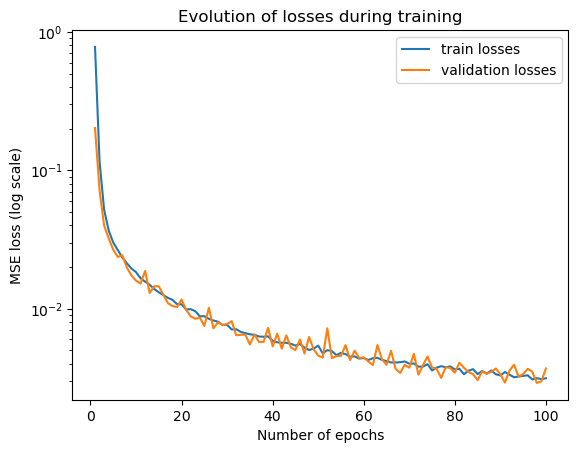

In [ ]:
plt.plot(np.arange(len(trained_model_3.train_losses))+1, trained_model_3.train_losses, label='train losses')
plt.plot(np.arange(len(trained_model_3.validation_losses))+1, trained_model_3.validation_losses, label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

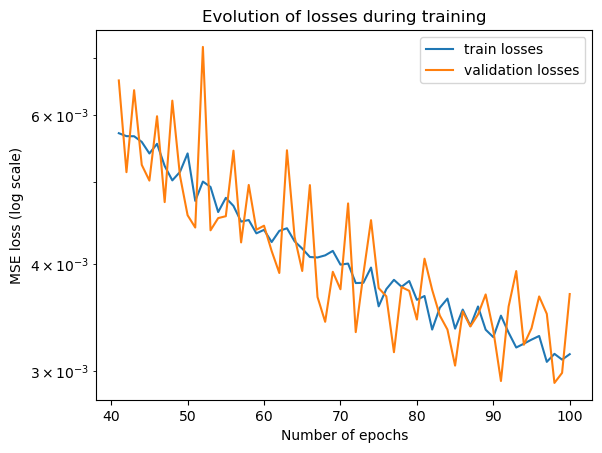

In [ ]:
plt.plot(np.arange(len(trained_model_3.train_losses[40:]))+41, trained_model_3.train_losses[40:], label='train losses')
plt.plot(np.arange(len(trained_model_3.validation_losses[40:]))+41, trained_model_3.validation_losses[40:], label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

## F) Load model

In [49]:
def load_my_model(model_path, model_t, optimizer_t=None):

    # Load model file
    device = "cuda" if torch.cuda.is_available() else "cpu"
    if device == "cpu":
        checkpoint = torch.load(model_path, weights_only=True, map_location=torch.device('cpu'))
    else:
        checkpoint = torch.load(model_path, weights_only=True)

    # model weights 
    model_t.load_state_dict(checkpoint['model_state_dict'])

    if optimizer_t is not None:
        # optimizer state 
        optimizer_t.load_state_dict(checkpoint['optimizer_state_dict'])

    # losses
    train_losses_t = checkpoint['train losses']
    validation_losses_t = checkpoint['validation losses']

    plt.plot(np.arange(len(train_losses_t))+1, train_losses_t, label='train losses')
    plt.plot(np.arange(len(validation_losses_t))+1, validation_losses_t, label='validation losses')
    plt.legend()
    plt.xlabel('Number of epochs')
    plt.ylabel('MSE loss (log scale)')
    plt.yscale('log')
    plt.title("Evolution of losses during training")
    plt.show()

    # Evaluate the model on the test set
    test_loss = evaluate_model(model_t, test_loader, custom_loss, device)
    print(f"Test Loss: {test_loss:.8f}")
    if optimizer_t is None:
        return model_t, train_losses_t, validation_losses_t, test_loss
    else: 
        return model_t, optimizer_t, train_losses_t, validation_losses_t, test_loss

### First models

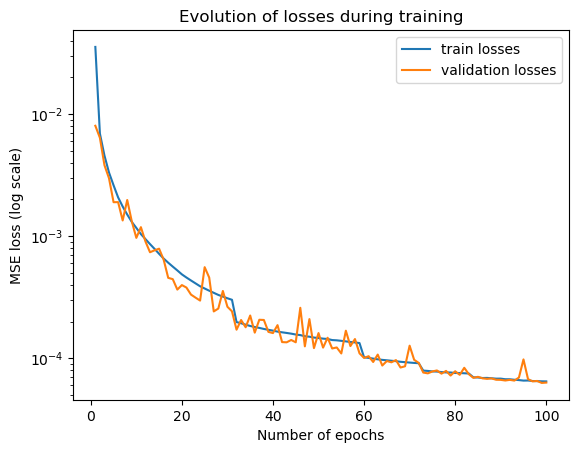

Test Loss: 0.002854


In [29]:
# load model file 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint3 = torch.load("model/model3_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint3 = torch.load("model/model3_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True)

model_t3 = MapUpdateNetwork_3()
optimizer_t3 = optim.Adam(model_t3.parameters(), lr=1e-3)

# model weights
model_t3.load_state_dict(checkpoint3['model_state_dict'])

# optimizer state 
optimizer_t3.load_state_dict(checkpoint3['optimizer_state_dict'])

# losses
train_losses_t3 = checkpoint3['train losses']
validation_losses_t3 = checkpoint3['validation losses']

plt.plot(np.arange(len(train_losses_t3))+1, train_losses_t3, label='train losses')
plt.plot(np.arange(len(validation_losses_t3))+1, validation_losses_t3, label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss3 = evaluate_model(model_t3, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss3:.6f}")

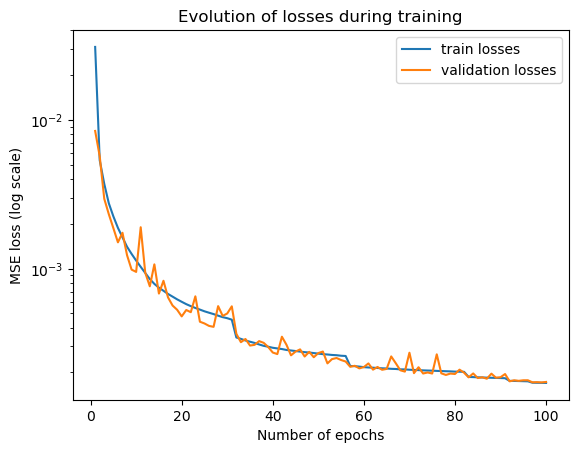

Test Loss: 0.001266


In [30]:
# load model state 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint2 = torch.load("model/model2_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint2 = torch.load("model/model2_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True)

model_t2 = MapUpdateNetwork_2()
optimizer_t2 = optim.Adam(model_t2.parameters(), lr=1e-3)

# model weights 
model_t2.load_state_dict(checkpoint2['model_state_dict'])

# opti state 
optimizer_t2.load_state_dict(checkpoint2['optimizer_state_dict'])

# losses
train_losses_t2 = checkpoint2['train losses']
validation_losses_t2 = checkpoint2['validation losses']

plt.plot(np.arange(len(train_losses_t2))+1, train_losses_t2, label='train losses')
plt.plot(np.arange(len(validation_losses_t2))+1, validation_losses_t2, label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss2 = evaluate_model(model_t2, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss2:.6f}")

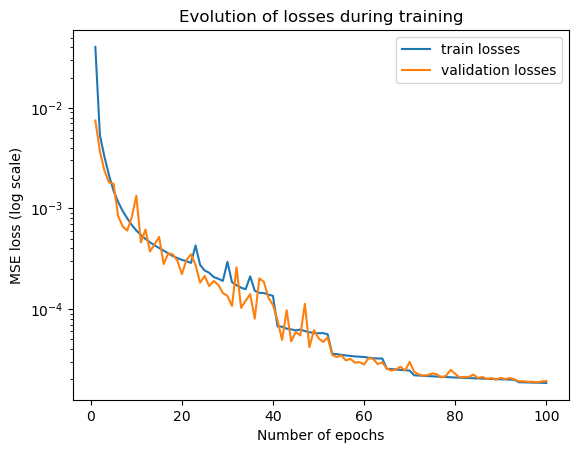

Test Loss: 0.003203


In [31]:
# load model file 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint1 = torch.load("model/model1_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint1 = torch.load("model/model1_100epochs_1280kaugtraindata_batchsize128.pth", weights_only=True)

model_t1 = MapUpdateNetwork_1()
optimizer_t1 = optim.Adam(model_t1.parameters(), lr=1e-3)

# model state 
model_t1.load_state_dict(checkpoint1['model_state_dict'])

# optimizer state 
optimizer_t1.load_state_dict(checkpoint1['optimizer_state_dict'])

# losses
train_losses_t1 = checkpoint1['train losses']
validation_losses_t1 = checkpoint1['validation losses']

plt.plot(np.arange(len(train_losses_t1))+1, train_losses_t1, label='train losses')
plt.plot(np.arange(len(validation_losses_t1))+1, validation_losses_t1, label='validation losses')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss1 = evaluate_model(model_t1, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss1:.6f}")

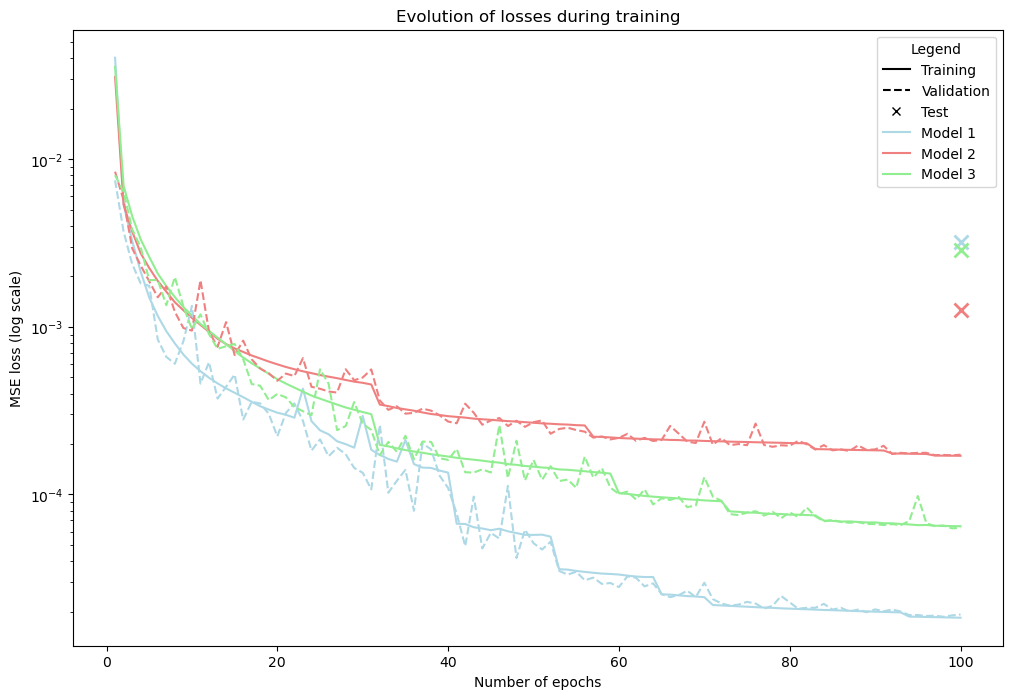

In [32]:
# Assign colors for each model
colors = {
    'model1': 'lightblue',
    'model2': 'lightcoral',
    'model3': 'lightgreen',
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(np.arange(len(train_losses_t1)) + 1, train_losses_t1, color=colors['model1'], linestyle='-')
plt.plot(np.arange(len(train_losses_t2)) + 1, train_losses_t2, color=colors['model2'], linestyle='-')
plt.plot(np.arange(len(train_losses_t3)) + 1, train_losses_t3, color=colors['model3'], linestyle='-')

# Plot validation losses 
plt.plot(np.arange(len(validation_losses_t1)) + 1, validation_losses_t1, color=colors['model1'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t2)) + 1, validation_losses_t2, color=colors['model2'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t3)) + 1, validation_losses_t3, color=colors['model3'], linestyle='--')

# Plot test losses (x symbol)
plt.plot(100, test_loss1, 'x', color=colors['model1'], markersize=10, markeredgewidth=2)
plt.plot(100, test_loss2, 'x', color=colors['model2'], markersize=10, markeredgewidth=2)
plt.plot(100, test_loss3, 'x', color=colors['model3'], markersize=10, markeredgewidth=2)

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='Training')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='Validation')
test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')

model1_patch = mlines.Line2D([], [], color=colors['model1'], label='Model 1', linestyle='-')
model2_patch = mlines.Line2D([], [], color=colors['model2'], label='Model 2', linestyle='-')
model3_patch = mlines.Line2D([], [], color=colors['model3'], label='Model 3', linestyle='-')

# Add the legend
plt.legend(handles=[train_line, validation_line, test_marker, model1_patch, model2_patch, model3_patch],
           loc='upper right', title='Legend')

# Add labels and title
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")

# Display the plot
plt.show()


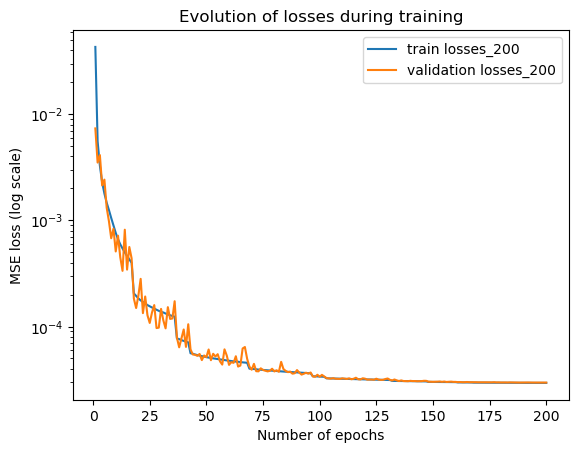

Test Loss: 0.001946


In [33]:
# load model file 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint1_200 = torch.load("model/model1_200epochs_1280kaugtraindata_batchsize128.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint1_200 = torch.load("model/model1_200epochs_1280kaugtraindata_batchsize128.pth", weights_only=True)

model_t1_200 = MapUpdateNetwork_1()
optimizer_t1_200 = optim.Adam(model_t1_200.parameters(), lr=1e-3)

# model weigths 
model_t1_200.load_state_dict(checkpoint1_200['model_state_dict'])

# optimizer state 
optimizer_t1_200.load_state_dict(checkpoint1_200['optimizer_state_dict'])

# losses
train_losses_t1_200 = checkpoint1_200['train losses']
validation_losses_t1_200 = checkpoint1_200['validation losses']

plt.plot(np.arange(len(train_losses_t1_200))+1, train_losses_t1_200, label='train losses_200')
plt.plot(np.arange(len(validation_losses_t1_200))+1, validation_losses_t1_200, label='validation losses_200')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss1_200 = evaluate_model(model_t1_200, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss1_200:.6f}")

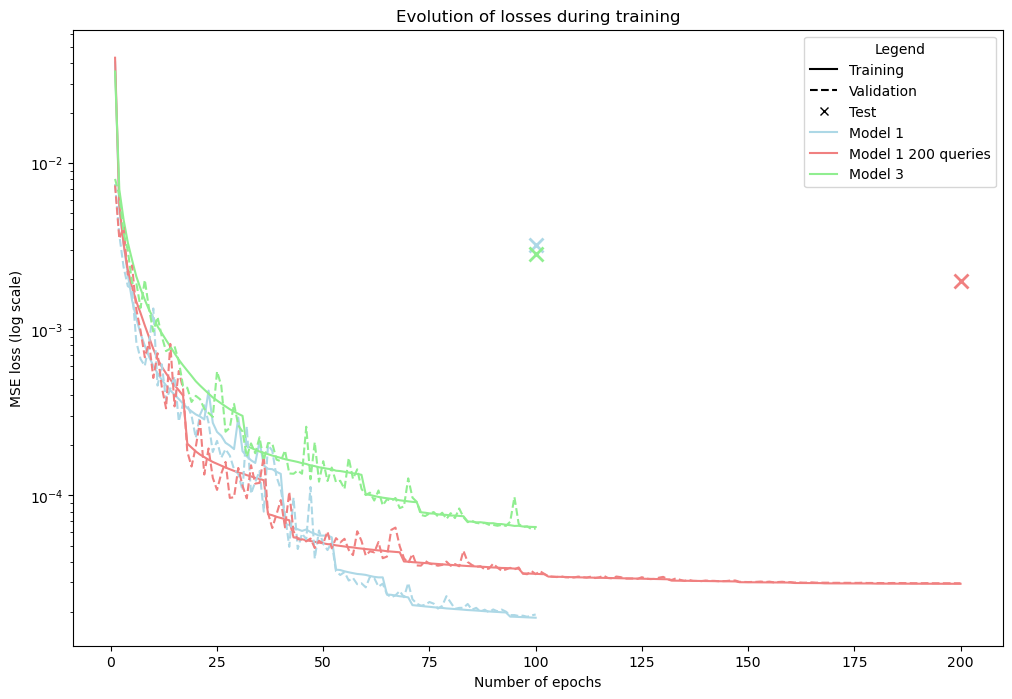

In [34]:
# Assign colors for each model
colors = {
    'model1': 'lightblue',
    'model1 200 queries': 'lightcoral',
    'model3': 'lightgreen',
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(np.arange(len(train_losses_t1)) + 1, train_losses_t1, color=colors['model1'], linestyle='-')
plt.plot(np.arange(len(train_losses_t1_200)) + 1, train_losses_t1_200, color=colors['model1 200 queries'], linestyle='-')
plt.plot(np.arange(len(train_losses_t3)) + 1, train_losses_t3, color=colors['model3'], linestyle='-')

# Plot validation losses 
plt.plot(np.arange(len(validation_losses_t1)) + 1, validation_losses_t1, color=colors['model1'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t1_200)) + 1, validation_losses_t1_200, color=colors['model1 200 queries'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t3)) + 1, validation_losses_t3, color=colors['model3'], linestyle='--')

# Plot test losses (x symbol)
plt.plot(100, test_loss1, 'x', color=colors['model1'], markersize=10, markeredgewidth=2)
plt.plot(200, test_loss1_200, 'x', color=colors['model1 200 queries'], markersize=10, markeredgewidth=2)
plt.plot(100, test_loss3, 'x', color=colors['model3'], markersize=10, markeredgewidth=2)

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='Training')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='Validation')
test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')

model1_patch = mlines.Line2D([], [], color=colors['model1'], label='Model 1', linestyle='-')
model2_patch = mlines.Line2D([], [], color=colors['model1 200 queries'], label='Model 1 200 queries', linestyle='-')
model3_patch = mlines.Line2D([], [], color=colors['model3'], label='Model 3', linestyle='-')

# Add the legend
plt.legend(handles=[train_line, validation_line, test_marker, model1_patch, model2_patch, model3_patch],
           loc='upper right', title='Legend')

# Add labels and title
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")

# Display the plot
plt.show()

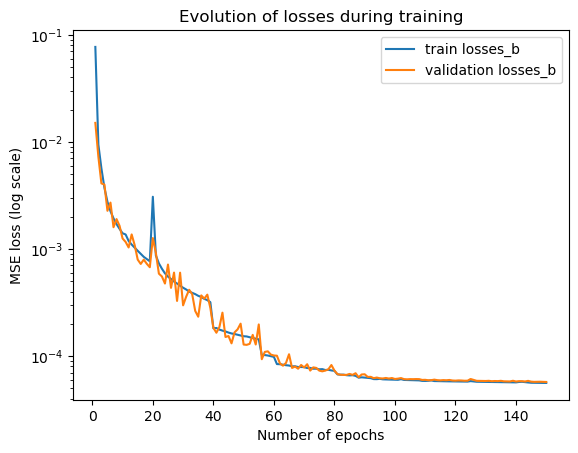

Test Loss: 0.002431


In [35]:
# load model file
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint1_b = torch.load("model/model1_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint1_b = torch.load("model/model1_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True)

model_t1_b = MapUpdateNetwork_1()
optimizer_t1_b = optim.Adam(model_t1_b.parameters(), lr=1e-3)

# model weights 
model_t1_b.load_state_dict(checkpoint1_b['model_state_dict'])

# optimizer state 
optimizer_t1_b.load_state_dict(checkpoint1_b['optimizer_state_dict'])

# losses
train_losses_t1_b = checkpoint1_b['train losses']
validation_losses_t1_b = checkpoint1_b['validation losses']

plt.plot(np.arange(len(train_losses_t1_b))+1, train_losses_t1_b, label='train losses_b')
plt.plot(np.arange(len(validation_losses_t1_b))+1, validation_losses_t1_b, label='validation losses_b')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss1_b = evaluate_model(model_t1_b, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss1_b:.6f}")

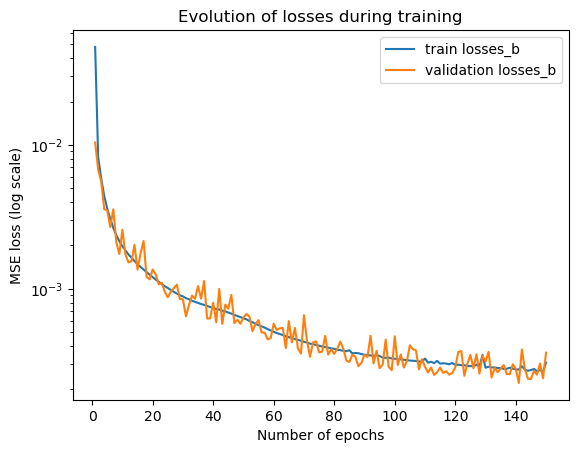

Test Loss: 0.005152


In [36]:
# load model file 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint2_b = torch.load("model/model2_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint2_b = torch.load("model/model2_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True)

model_t2_b = MapUpdateNetwork_2()
optimizer_t2_b = optim.Adam(model_t2_b.parameters(), lr=1e-3)

# model weights
model_t2_b.load_state_dict(checkpoint2_b['model_state_dict'])

# optimizer state
optimizer_t2_b.load_state_dict(checkpoint2_b['optimizer_state_dict'])

# losses
train_losses_t2_b = checkpoint2_b['train losses']
validation_losses_t2_b = checkpoint2_b['validation losses']

plt.plot(np.arange(len(train_losses_t2_b))+1, train_losses_t2_b, label='train losses_b')
plt.plot(np.arange(len(validation_losses_t2_b))+1, validation_losses_t2_b, label='validation losses_b')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss2_b = evaluate_model(model_t2_b, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss2_b:.6f}")

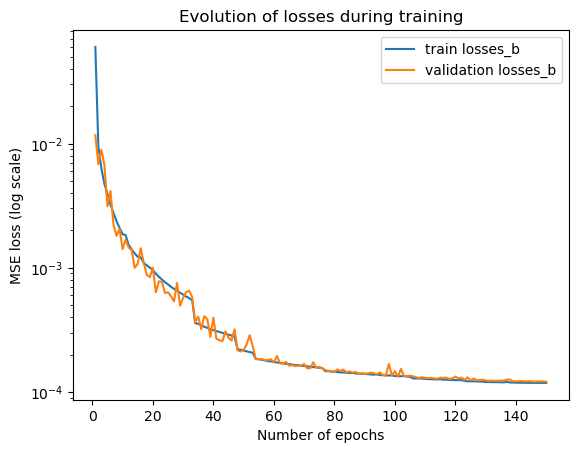

Test Loss: 0.005732


In [37]:
# load model file 
device = "cuda" if torch.cuda.is_available() else "cpu"
if device == "cpu":
    checkpoint3_b = torch.load("model/model3_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True, map_location=torch.device('cpu'))
else:
    checkpoint3_b = torch.load("model/model3_150epochs_1280kaugtraindata_batchsize256.pth", weights_only=True)

model_t3_b = MapUpdateNetwork_3()
optimizer_t3_b = optim.Adam(model_t3_b.parameters(), lr=1e-3)

# model weigths 
model_t3_b.load_state_dict(checkpoint3_b['model_state_dict'])

# optimizer state
optimizer_t3_b.load_state_dict(checkpoint3_b['optimizer_state_dict'])

# losses
train_losses_t3_b = checkpoint3_b['train losses']
validation_losses_t3_b = checkpoint3_b['validation losses']

plt.plot(np.arange(len(train_losses_t3_b))+1, train_losses_t3_b, label='train losses_b')
plt.plot(np.arange(len(validation_losses_t3_b))+1, validation_losses_t3_b, label='validation losses_b')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.show()

# Evaluate the model on the test set
test_loss3_b = evaluate_model(model_t3_b, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss3_b:.6f}")

### Other models 

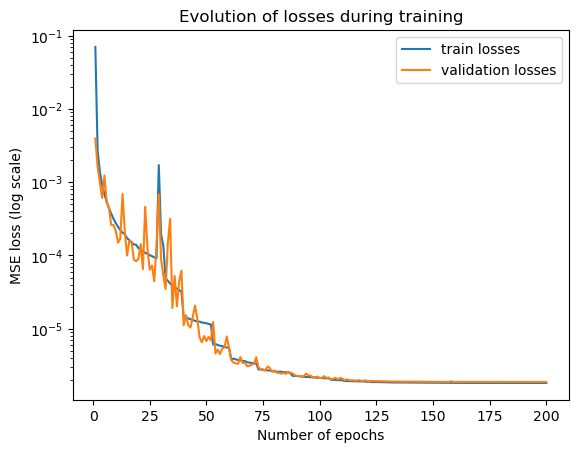

Test Loss: 0.00011937


In [58]:
my_model = MapUpdateNetwork_6()
model_t6_b, train_losses_t6_b, validation_losses_t6_b, test_loss6_b = load_my_model('model/model6_200epochs_1280kaugtraindata_batchsize256.pth', my_model)

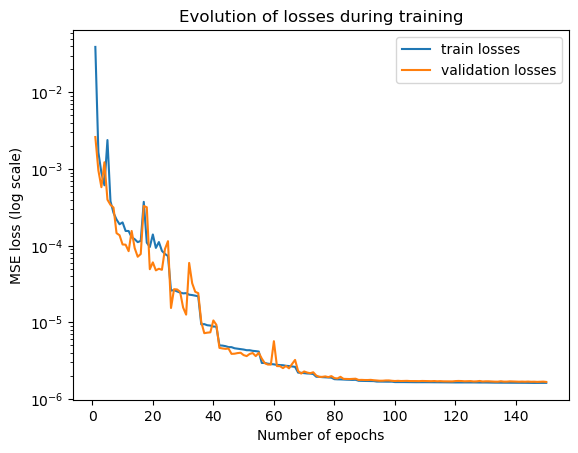

Test Loss: 0.00103752


In [57]:
my_model = MapUpdateNetwork_6()
model_t6, train_losses_t6, validation_losses_t6, test_loss6 = load_my_model('model/model6_150epochs_1280kaugtraindata_batchsize128.pth', my_model)

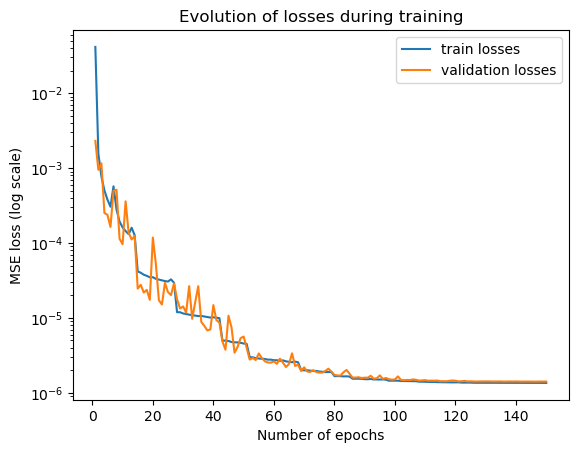

Test Loss: 0.00007890


In [56]:
my_model = MapUpdateNetwork_6()
model_t6_b2, train_losses_t6_b2, validation_losses_t6_b2, test_loss6_b2 = load_my_model('model/model6_150epochs_1280kaugtraindata_batchsize64.pth', my_model)

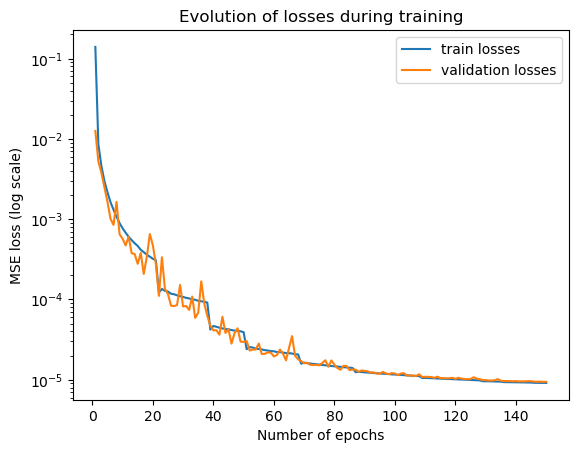

Test Loss: 0.00174427


In [55]:
my_model = MapUpdateNetwork_6()
model_t6_b3, train_losses_t6_b3, validation_losses_t6_b3, test_loss6_b3 = load_my_model('model/model6_150epochs_1280kaugtraindata_batchsize512.pth', my_model)

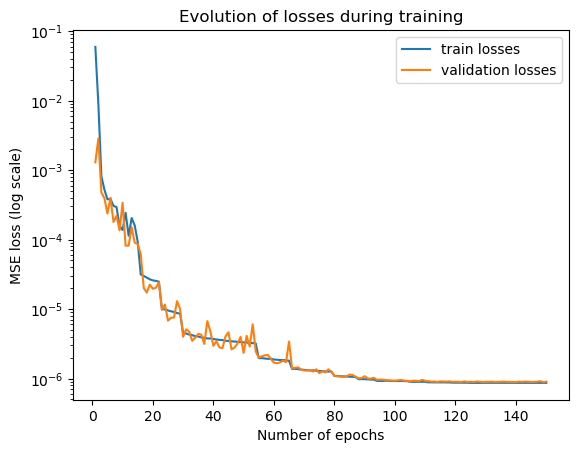

Test Loss: 0.01011439


In [54]:
my_model = MapUpdateNetwork_7()
model_t7, train_losses_t7, validation_losses_t7, test_loss7 = load_my_model('model/model7_150epochs_1280kaugtraindata_batchsize128.pth', my_model)

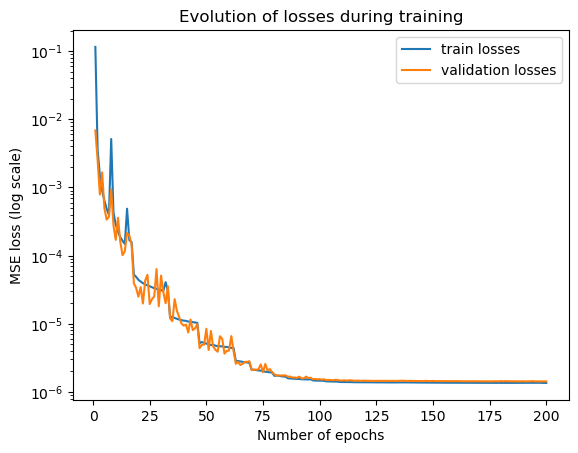

Test Loss: 0.00298496


In [53]:
my_model = MapUpdateNetwork_7()
model_t7_b1, train_losses_t7_b1, validation_losses_t7_b1, test_loss7_b1 = load_my_model('model/model7_200epochs_1280kaugtraindata_batchsize256.pth', my_model)

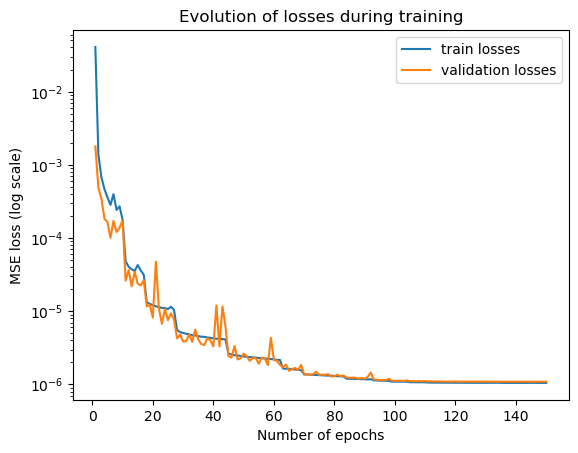

Test Loss: 0.00264287


In [52]:
my_model = MapUpdateNetwork_7()
model_t7_b2, train_losses_t7_b2, validation_losses_t7_b2, test_loss7_b2 = load_my_model('model/model7_150epochs_1280kaugtraindata_batchsize64.pth', my_model)

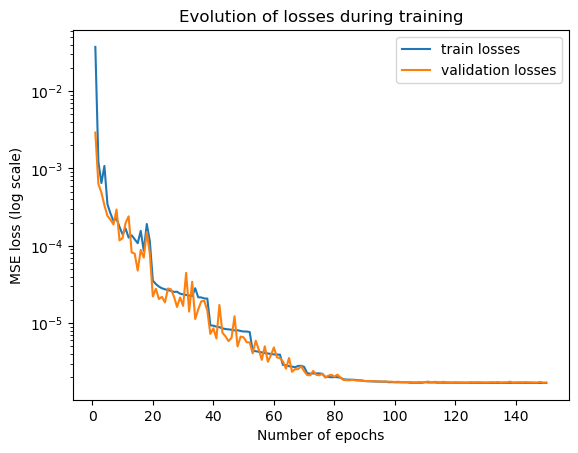

Test Loss: 0.00000170


In [93]:
my_model = MapUpdateNetwork_6()
model_t6_C5, train_losses_t6_C, validation_losses_t6_C, test_loss6_C = load_my_model('model/model6_C_150epochs_1280kaugtraindata_batchsize128.pth', my_model)

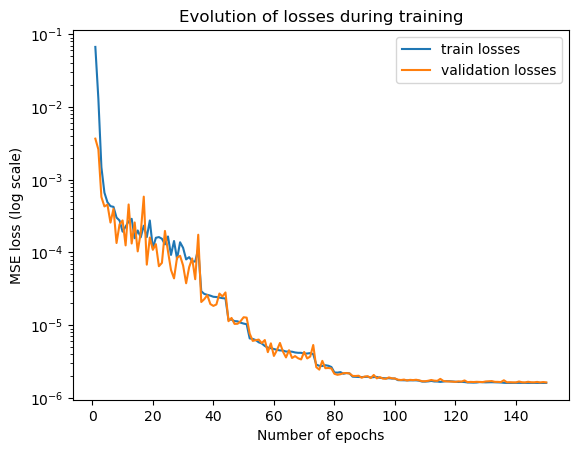

Test Loss: 0.00000157


In [94]:
my_model = MapUpdateNetwork_7()
model_t7_C5, train_losses_t7_C, validation_losses_t7_C, test_loss7_C = load_my_model('model/model7_C_150epochs_1280kaugtraindata_batchsize128.pth', my_model)

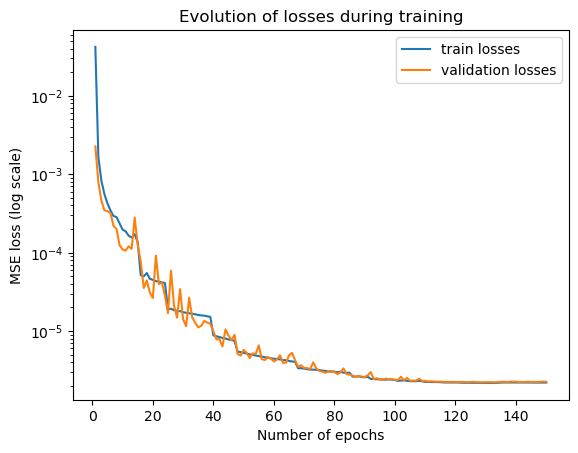

Test Loss: 0.00000225


In [100]:
my_model = MapUpdateNetwork_6()
model_t6_C5_bis, train_losses_t6_C, validation_losses_t6_C, test_loss6_C = load_my_model('model/model6_C_150epochs_1280kaugtraindata_batchsize128_bis.pth', my_model)

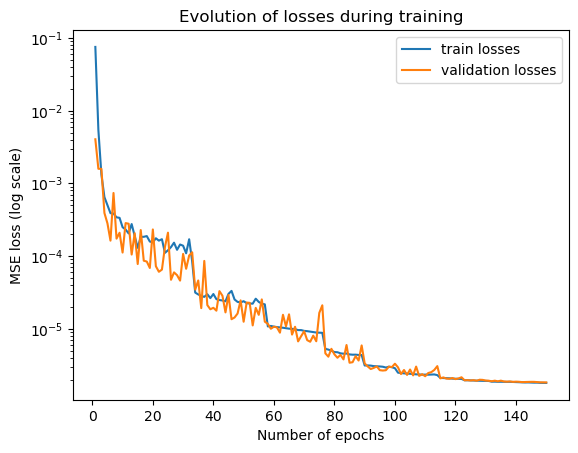

Test Loss: 0.00000176


In [101]:
my_model = MapUpdateNetwork_7()
model_t7_C5_bis, train_losses_t7_C, validation_losses_t7_C, test_loss7_C = load_my_model('model/model7_C_150epochs_1280kaugtraindata_batchsize128_bis.pth', my_model)

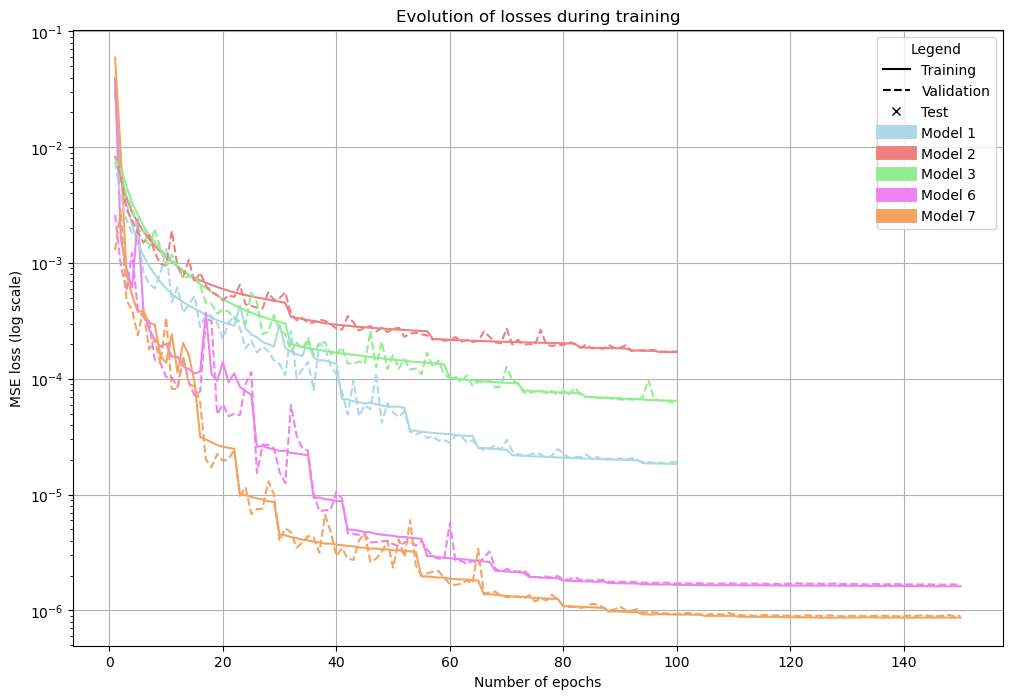

In [59]:
# Assign colors for each model
colors = {
    'model1': 'lightblue',
    'model2': 'lightcoral',
    'model3': 'lightgreen',
    'model6': 'violet',
    'model7': 'sandybrown'
}

plt.figure(figsize=(12, 8)) 

# Plot training losses 
plt.plot(np.arange(len(train_losses_t1)) + 1, train_losses_t1, color=colors['model1'], linestyle='-')
plt.plot(np.arange(len(train_losses_t2)) + 1, train_losses_t2, color=colors['model2'], linestyle='-')
plt.plot(np.arange(len(train_losses_t3)) + 1, train_losses_t3, color=colors['model3'], linestyle='-')
plt.plot(np.arange(len(train_losses_t6)) + 1, train_losses_t6, color=colors['model6'], linestyle='-')
plt.plot(np.arange(len(train_losses_t7)) + 1, train_losses_t7, color=colors['model7'], linestyle='-')
# plt.plot(np.arange(len(train_losses_t1_b)) + 1, train_losses_t1_b, color=colors['model1'], linestyle='-', linewidth = '3')
# plt.plot(np.arange(len(train_losses_t2_b)) + 1, train_losses_t2_b, color=colors['model2'], linestyle='-', linewidth = '3')
# plt.plot(np.arange(len(train_losses_t3_b)) + 1, train_losses_t3_b, color=colors['model3'], linestyle='-', linewidth = '3')
# plt.plot(np.arange(len(train_losses_t6_b)) + 1, train_losses_t6_b, color=colors['model6'], linestyle='-', linewidth = '3')
# plt.plot(np.arange(len(train_losses_t6_b2)) + 1, train_losses_t6_b2, color=colors['model6'], linestyle='-', linewidth = '3')

# Plot validation losses 
plt.plot(np.arange(len(validation_losses_t1)) + 1, validation_losses_t1, color=colors['model1'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t2)) + 1, validation_losses_t2, color=colors['model2'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t3)) + 1, validation_losses_t3, color=colors['model3'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t6)) + 1, validation_losses_t6, color=colors['model6'], linestyle='--')
plt.plot(np.arange(len(validation_losses_t7)) + 1, validation_losses_t7, color=colors['model7'], linestyle='--')
# plt.plot(np.arange(len(validation_losses_t1_b)) + 1, validation_losses_t1_b, color=colors['model1'], linestyle='--', linewidth = '3')
# plt.plot(np.arange(len(validation_losses_t2_b)) + 1, validation_losses_t2_b, color=colors['model2'], linestyle='--', linewidth = '3')
# plt.plot(np.arange(len(validation_losses_t3_b)) + 1, validation_losses_t3_b, color=colors['model3'], linestyle='--', linewidth = '3')
# plt.plot(np.arange(len(validation_losses_t6_b)) + 1, validation_losses_t6_b, color=colors['model6'], linestyle='--', linewidth = '3')
# plt.plot(np.arange(len(validation_losses_t6_b2)) + 1, validation_losses_t6_b2, color=colors['model6'], linestyle='--', linewidth = '3')

# Plot test losses (x symbol)
# plt.plot(100, test_loss1, 'x', color=colors['model1'], markersize=10, markeredgewidth=2)
# plt.plot(100, test_loss2, 'x', color=colors['model2'], markersize=10, markeredgewidth=2)
# plt.plot(100, test_loss3, 'x', color=colors['model3'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss6, 'x', color=colors['model6'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss7, 'x', color=colors['model7'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss1_b, 'x', color=colors['model1'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss2_b, 'x', color=colors['model2'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss3_b, 'x', color=colors['model3'], markersize=10, markeredgewidth=2)
# plt.plot(200, test_loss6_b, 'x', color=colors['model6'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss6_b2, 'x', color=colors['model6'], markersize=10, markeredgewidth=2)

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='Training')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='Validation')
test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')
# batchsize_line = mlines.Line2D([], [], color='black', linestyle='-', label='batchize=1024', linewidth = '3')

model1_patch = mlines.Line2D([], [], color=colors['model1'], label='Model 1', linestyle='-', linewidth = '10')
model2_patch = mlines.Line2D([], [], color=colors['model2'], label='Model 2', linestyle='-', linewidth = '10')
model3_patch = mlines.Line2D([], [], color=colors['model3'], label='Model 3', linestyle='-', linewidth = '10')
model6_patch = mlines.Line2D([], [], color=colors['model6'], label='Model 6', linestyle='-', linewidth = '10')
model7_patch = mlines.Line2D([], [], color=colors['model7'], label='Model 7', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, test_marker, model1_patch, model2_patch, model3_patch, model6_patch, model7_patch],
           loc='upper right', title='Legend')

# Add labels and title
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.grid()

# Display the plot
plt.show()

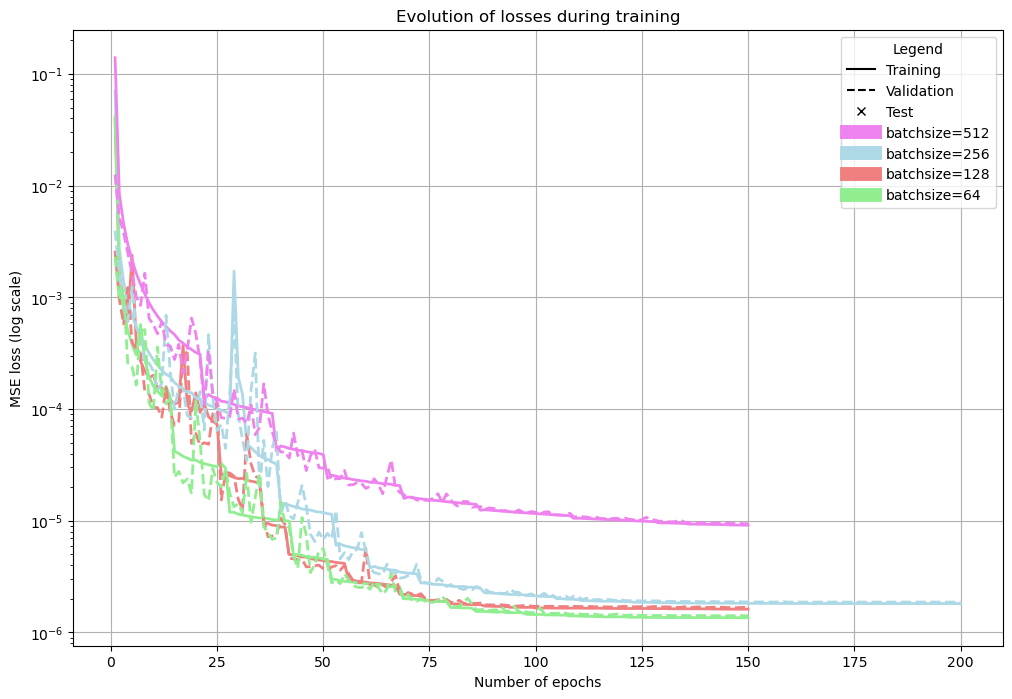

In [60]:
colors = {
    'batchsize=256': 'lightblue',
    'batchsize=128': 'lightcoral',
    'batchsize=64': 'lightgreen',
    'batchsize=512': 'violet',
}

plt.figure(figsize=(12, 8))

plt.plot(np.arange(len(train_losses_t6)) + 1, train_losses_t6, color=colors['batchsize=128'], linestyle='-', linewidth = '2')
plt.plot(np.arange(len(train_losses_t6_b)) + 1, train_losses_t6_b, color=colors['batchsize=256'], linestyle='-', linewidth = '2')
plt.plot(np.arange(len(train_losses_t6_b2)) + 1, train_losses_t6_b2, color=colors['batchsize=64'], linestyle='-', linewidth = '2')
plt.plot(np.arange(len(train_losses_t6_b3)) + 1, train_losses_t6_b3, color=colors['batchsize=512'], linestyle='-', linewidth = '2')

plt.plot(np.arange(len(validation_losses_t6)) + 1, validation_losses_t6, color=colors['batchsize=128'], linestyle='--', linewidth = '2')
plt.plot(np.arange(len(validation_losses_t6_b)) + 1, validation_losses_t6_b, color=colors['batchsize=256'], linestyle='--', linewidth = '2')
plt.plot(np.arange(len(validation_losses_t6_b2)) + 1, validation_losses_t6_b2, color=colors['batchsize=64'], linestyle='--', linewidth = '2')
plt.plot(np.arange(len(validation_losses_t6_b3)) + 1, validation_losses_t6_b3, color=colors['batchsize=512'], linestyle='--', linewidth = '2')

# plt.plot(150, test_loss6, 'x', color=colors['batchsize=128'], markersize=10, markeredgewidth=2)
# plt.plot(200, test_loss6_b, 'x', color=colors['batchsize=256'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss6_b2, 'x', color=colors['batchsize=64'], markersize=10, markeredgewidth=2)
# plt.plot(150, test_loss6_b3, 'x', color=colors['batchsize=512'], markersize=10, markeredgewidth=2)

# Create custom legend entries
train_line = mlines.Line2D([], [], color='black', linestyle='-', label='Training')
validation_line = mlines.Line2D([], [], color='black', linestyle='--', label='Validation')
test_marker = mlines.Line2D([], [], color='black', marker='x', linestyle='', label='Test')

batchsize1_patch = mlines.Line2D([], [], color=colors['batchsize=256'], label='batchsize=256', linestyle='-', linewidth = '10')
batchsize2_patch = mlines.Line2D([], [], color=colors['batchsize=128'], label='batchsize=128', linestyle='-', linewidth = '10')
batchsize3_patch = mlines.Line2D([], [], color=colors['batchsize=64'], label='batchsize=64', linestyle='-', linewidth = '10')
batchsize4_patch = mlines.Line2D([], [], color=colors['batchsize=512'], label='batchsize=512', linestyle='-', linewidth = '10')

# Add the legend
plt.legend(handles=[train_line, validation_line, test_marker, batchsize4_patch, batchsize1_patch, batchsize2_patch, batchsize3_patch],
           loc='upper right', title='Legend')

# Add labels and title
plt.xlabel('Number of epochs')
plt.ylabel('MSE loss (log scale)')
plt.yscale('log')
plt.title("Evolution of losses during training")
plt.grid()

# Display the plot
plt.show()



## G) RESULTS

In [53]:
# Evaluate the model on the test set
test_loss = evaluate_model(model_t7, test_loader, custom_loss, device)
print(f"Test Loss: {test_loss:.8f}")

Test Loss: 0.00000083


## H) Postprocess

In [54]:
model_t7.eval()
outputs = model_t7(*torch.split(test_X[0:10], 1, dim=1))

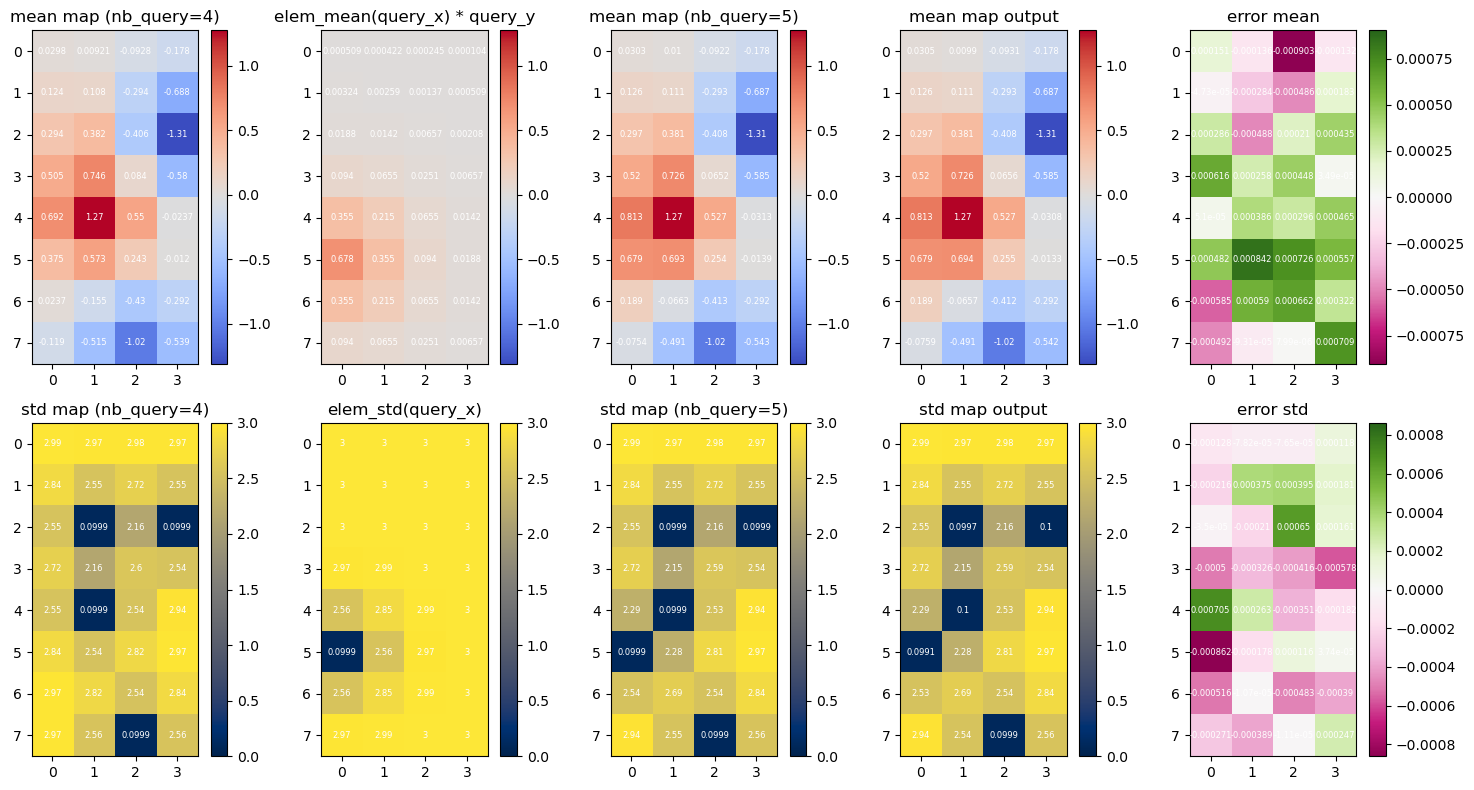

In [55]:
compare_output_label(train_input=test_X, train_label=test_Y, output=outputs.detach(), comb_idx=4, values=True)

In [47]:
plot_combinations(train_input=test_X, train_label=test_Y, output=outputs.detach(), comb_idx_range=(0, 9), values=True)

interactive(children=(IntSlider(value=0, description='Comb Index', max=9), Output()), _dom_classes=('widget-in…

### with 3 queries 

In [56]:
input_files = ['dataset/emgALL/og_A_3que_4kcomb_rat5_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_3queries_test = concatenate_dataset(input_files) 
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
test_3que_input = loaded_data_3queries_test["train_input"]  # The input data for training
test_3que_label = loaded_data_3queries_test["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_3queries_test["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_3que_4kcomb_rat5_emg1
 nb_queries: 3
 nb_comb: 4000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_3que_4kcomb_rat5_emg2
 nb_queries: 3
 nb_comb: 4000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_3que_4kcomb_rat5_emg3
 nb_queries: 3
 nb_comb: 4000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_3que_4kcomb_rat5_emg4
 nb_queries: 3
 nb_comb: 4000
 kernel_type: Mat52
 noise_std: 0.1


In [57]:
test_3que_X = test_3que_input
test_3que_Y = test_3que_label

test_3que_dataset = TensorDataset(test_3que_X, test_3que_Y)
test_3que_loader = DataLoader(test_3que_dataset, batch_size=batch_size, shuffle=False)

In [61]:
# Evaluate the model on the test 3 queries set
test_loss = evaluate_model(model_t6_b2, test_3que_loader, custom_loss, device)
print(f"Test Loss: {test_loss:.8f}")

Test Loss: 0.00000077


In [51]:
model_t6_b2.eval()
outputs = model_t6_b2(*torch.split(test_3que_X[0:10], 1, dim=1))

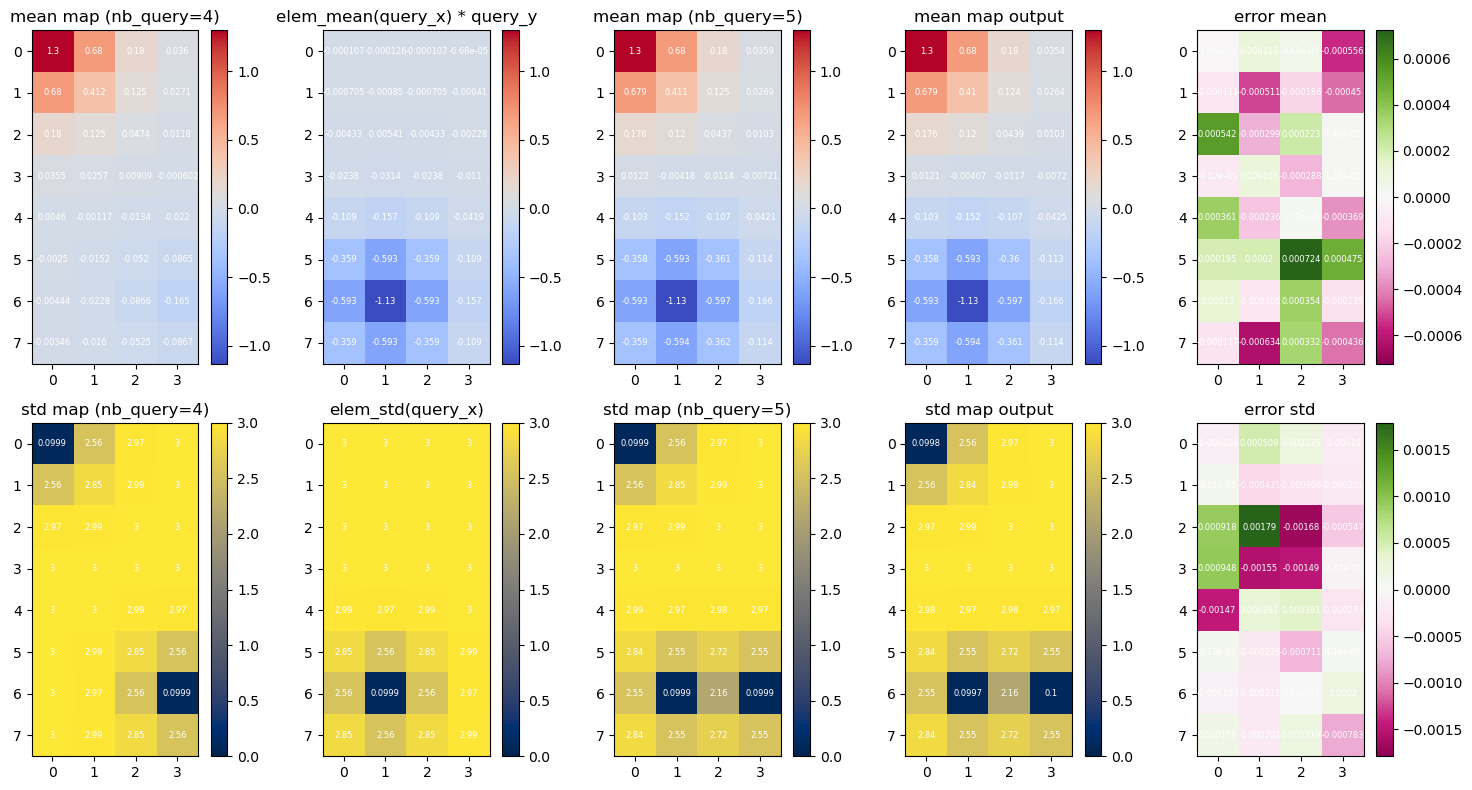

In [52]:
compare_output_label(train_input=test_3que_X, train_label=test_3que_Y, output=outputs.detach(), comb_idx=4, values=True)

### with 10 queries 

In [62]:
input_files = ['dataset/emgALL/og_A_10que_10kcomb_rat5_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
loaded_data_10queries_test = concatenate_dataset(input_files) 
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
test_10que_input = loaded_data_10queries_test["train_input"]  # The input data for training
test_10que_label = loaded_data_10queries_test["train_label"]  # The corresponding labels for the training data
loaded_description = loaded_data_10queries_test["description"]  # The description or metadata associated with the data

print(loaded_description)

These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg1
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg2
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg3
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These labeled inputs were made with these parameters:
 name: A_10que_10kcomb_rat5_emg4
 nb_queries: 10
 nb_comb: 10000
 kernel_type: Mat52


In [65]:
test_10que_X = test_10que_input
test_10que_Y = test_10que_label

test_10que_dataset = TensorDataset(test_10que_X, test_10que_Y)
test_10que_loader = DataLoader(test_10que_dataset, batch_size=batch_size, shuffle=False)

In [70]:
# Evaluate the model on the test 3 queries set
test_loss = evaluate_model(model_t6_b2, test_10que_loader, custom_loss, device)
print(f"Test Loss: {test_loss:.8f}")

Test Loss: 0.00041070


In [56]:
model_t6_b2.eval()
outputs = model_t6_b2(*torch.split(test_10que_X[0:10], 1, dim=1))

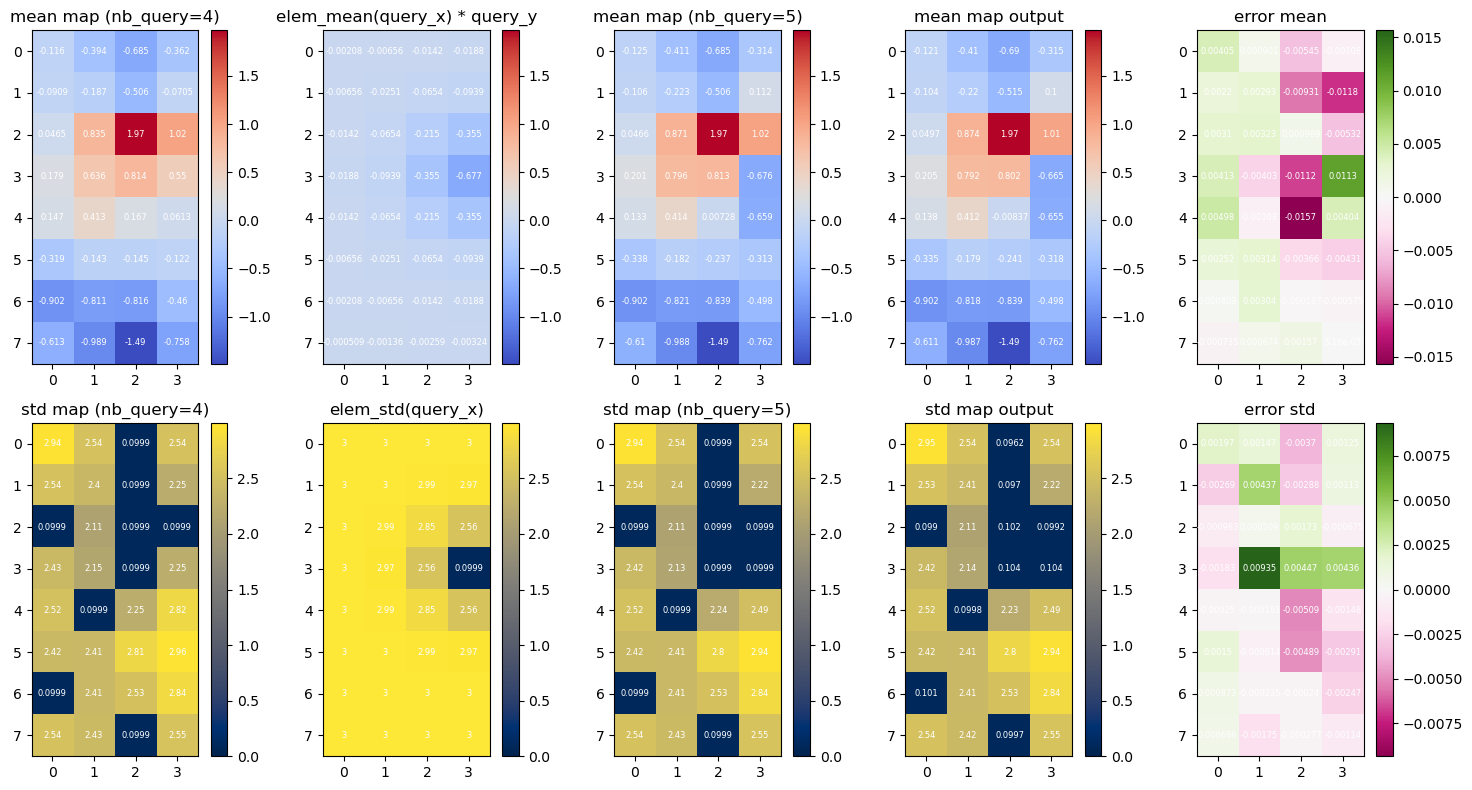

In [57]:
compare_output_label(train_input=test_10que_X, train_label=test_10que_Y, output=outputs.detach(), comb_idx=1, values=True)

### Test with different datasets 

In [94]:
input_files = ['dataset/emgALL/og_C_20que_10kcomb_rat5_emgALL.pth',
              ]

# Load the saved data from a .pth file using PyTorch
my_loaded_data_test = concatenate_dataset(input_files) 
# The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

# Access the tensors and the description from the loaded data
my_test_input = my_loaded_data_test["train_input"]  # The input data for training
my_test_label = my_loaded_data_test["train_label"]  # The corresponding labels for the training data
loaded_description = my_loaded_data_test["description"]  # The description or metadata associated with the data

print(loaded_description)

my_test_X = my_test_input
my_test_Y = my_test_label

batch_size_eval = 512

my_test_dataset = TensorDataset(my_test_X, my_test_Y)
my_test_loader = DataLoader(my_test_dataset, batch_size=batch_size_eval, shuffle=False)

These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 20que_10kcomb_rat5_emg1
 nb_queries: 20
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT uniques 
and these parameters:
 name: 20que_10kcomb_rat5_emg2
 nb_queries: 20
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]; These labeled inputs have the original form.
These pre-labeled inputs were made with the following method : we have used sampling with replacement to choose the queries. And all the samples are NOT un

In [95]:
# Evaluate the model on the test 3 queries set
test_loss = evaluate_model(model_t6_b2, my_test_loader, custom_loss, device)
print(f"Test Loss: {test_loss:.8f}")

Test Loss: 0.00714997


In [96]:
model_t6_b2.eval()
outputs = model_t6_b2(*torch.split(my_test_X[0:10], 1, dim=1))

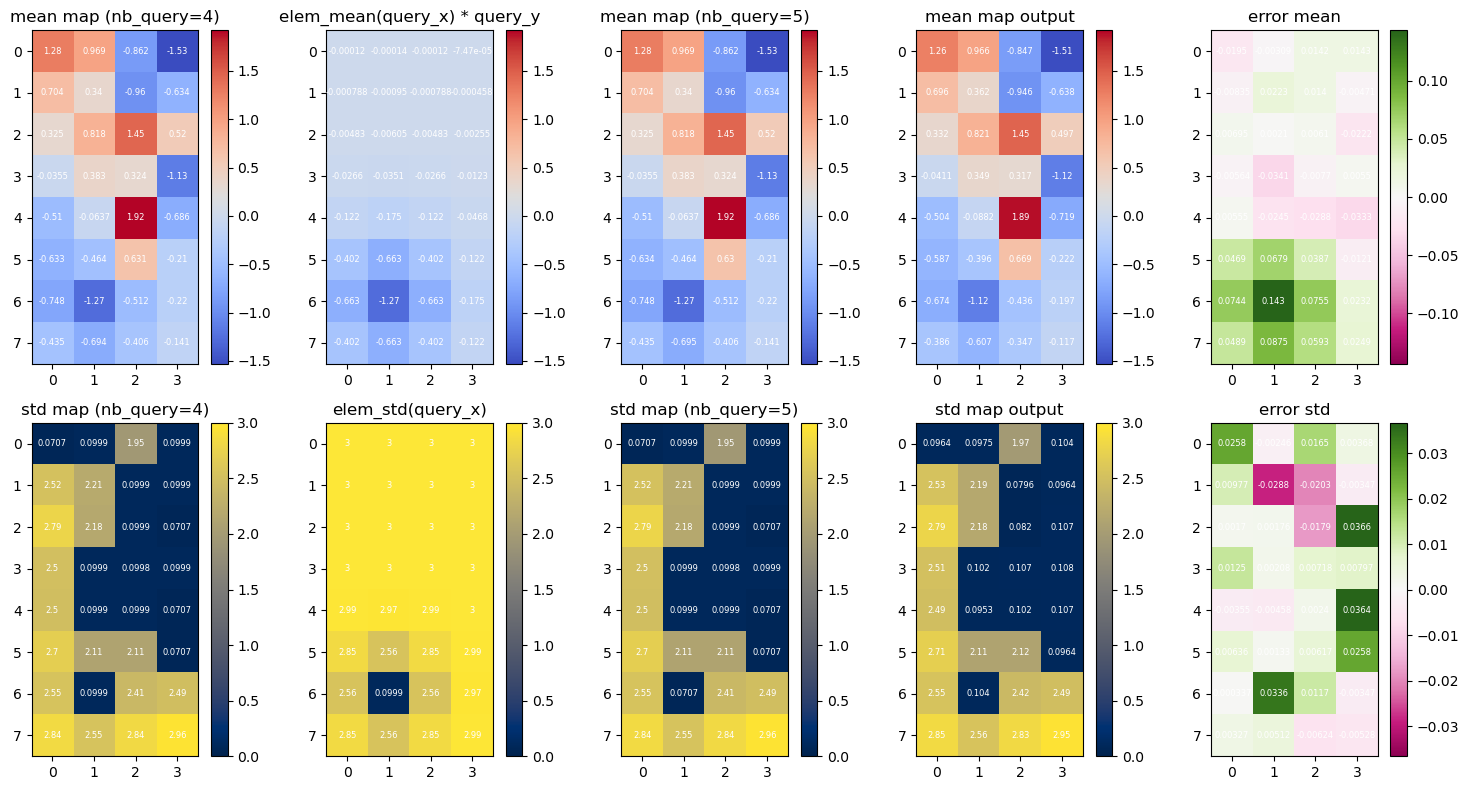

In [98]:
compare_output_label(train_input=my_test_X, train_label=my_test_Y, 
                     output=outputs.detach(), comb_idx=3, values=True)

### Compare models with various datasets 

In [65]:
def get_dataset(dataset_file, batch_size=512):
    # Load the saved data from a .pth file using PyTorch
    my_loaded_data_test = torch.load(dataset_file, weights_only=True) 
    # The 'weights_only=True' argument ensures that only the model weights (not the entire model) are loaded

    # Access the tensors and the description from the loaded data
    my_test_input = my_loaded_data_test["train_input"]  # The input data for training
    my_test_label = my_loaded_data_test["train_label"]  # The corresponding labels for the training data

    my_test_X = my_test_input
    my_test_Y = my_test_label

    batch_size_eval = batch_size

    my_test_dataset = TensorDataset(my_test_X, my_test_Y)
    my_test_loader = DataLoader(my_test_dataset, batch_size=batch_size_eval, shuffle=False)
    
    return my_test_loader

In [ ]:
def compare_models(models, datasets_files, models_labels, datasets_labels, title="Model Comparison", figsize=(10, 6)):
    """
    Creates a grouped bar chart comparing the results of models across multiple datasets.

    Arguments:
        - models (list):
        - dataset_files (list):
        - model_labels (list of str): List of labels for the models.
        - dataset_labels (list of str): List of labels for the datasets.
        - title (str): Title for the chart.
        - figsize (tuple): Size of the figure (width, height).

    Returns:
        - None: Displays the chart.
    """
    # Set the positions for the dataset labels along the x-axis
    x = np.arange(len(datasets_labels))  # Position of datasets on the x-axis
    width = 0.15  # Width of each bar in the group
    num_models = len(models_labels)  # Number of models

    # Initialize the figure for plotting
    fig, ax = plt.subplots(figsize=figsize)

    # Variable to shift the bars for each model
    multiplier = 0

    models_results = []

    for dataset_file in datasets_files:
        my_test_loader = get_dataset(dataset_file=dataset_file)
        results_for_my_test_loader = []
        for model in models:
            results_for_my_test_loader.append(evaluate_model(model=model, test_loader=my_test_loader, 
                                                             criterion_function=custom_loss, device=device))
        models_results.append(results_for_my_test_loader)
        
    
    # Loop over each model and add bars for each dataset
    for model_index, model_label in enumerate(models_labels):
        # Extract the results for the current model from each dataset
        model_results = [models_results[dataset_idx][model_index] for dataset_idx in range(len(datasets_labels))]
        
        # Offset to position the bars correctly for each model
        offset = width * multiplier
        
        # Plot the bars for the current model, grouped by dataset
        rects = ax.bar(x + offset, model_results, width, label=model_label)
        
        # Add the values (loss) on top of the bars, rounded to 3 significant digits
        ax.bar_label(
            rects,
            labels=[f"{value:.3g}" for value in model_results],  # Format to 3 significant digits
            padding=3, 
            rotation=90 
        )
        
        # Increment the multiplier to shift the next model's bars
        multiplier += 1

    # Add labels, title, and other customizations
    ax.set_ylabel('Loss (or other metric)')  # Y-axis label
    ax.set_title(title)  # Title of the chart
    ax.set_xticks(x + width * (num_models - 1) / 2)  # Set x-tick positions in the middle of the grouped bars
    ax.set_xticklabels(datasets_labels, rotation=45)  # Set dataset labels on the x-axis, rotated for better visibility
    ax.legend(title="Models", loc='upper left', ncols=3)  # Add a legend for models
    ax.set_yscale('log')  # Logarithmic scale for y-axis
    ax.set_ylim(0, 10*max(max(models_results[dataset_idx]) for dataset_idx in range(len(datasets_labels))))  # Set the y-axis range based on the data

    plt.tight_layout()  # Adjust layout to make sure everything fits well
    plt.show()  # Display the chart

    return(models_results)



 C:\Users\deleu\AppData\Local\Temp\ipykernel_3268\3405389891.py:67: UserWarning:Attempt to set non-positive ylim on a log-scaled axis will be ignored.


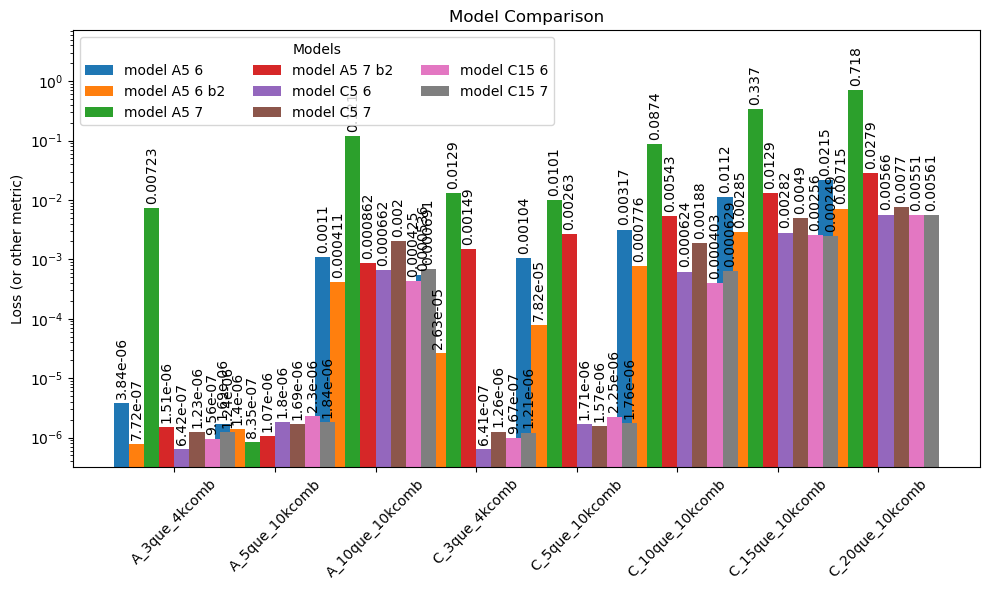

In [ ]:
models = [# model_t6,
          model_t6_b2, 
          # model_t7,
          model_t7_b2,
          model_t6_C5,
          model_t7_C5,
          model_t6_C15,
          model_t7_C15,
          ]
models_labels = [#'model A5 6',
                 'model A5 6 b2',
                 #'model A5 7',
                 'model A5 7 b2',
                 'model C5 6',
                 'model C5 7',
                 'model C15 6',
                 'model C15 7',
                 ]
datasets_files = ['dataset/emgALL/og_A_3que_4kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_A_5que_10kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_A_10que_10kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_C_3que_4kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_C_5que_10kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_C_10que_10kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_C_15que_10kcomb_rat5_emgALL.pth',
                 'dataset/emgALL/og_C_20que_10kcomb_rat5_emgALL.pth',
                ]
datasets_labels = ['A_3que_4kcomb',
                   'A_5que_10kcomb',
                   'A_10que_10kcomb',
                   'C_3que_4kcomb',
                   'C_5que_10kcomb',
                   'C_10que_10kcomb',
                   'C_15que_10kcomb',
                   'C_20que_10kcomb',
                   ]

my_models_results = compare_models(models, datasets_files, models_labels, datasets_labels)